# Анализ деятельности развлекательного приложения Procrastinate Pro+

Цель данного исследования - поиск причин убыточности компании и разработка предложений по повышению эффективности бизнеса.

В процессе исследования предстоит выполнить следующие задачи: <br>
1. Предвариетльный анализ данных и предобработка данных при необходимости.<br>
2. Создание функций для расчёта и визуализации бизнес-показателей.<br>
3. Исследовательский анализ данных:<br>
3.1 Получение профилей пользователей. <br>
3.2 Оценка доли платящих пользователей в зависимости от:<br>
- страны;<br>
- применяемого устройства;<br>
- канала привлечения пользователей.<br>
4. Оценка затрат на маркетинг:<br>
4.1 Расчёт общих затрат на маркетинг.<br>
4.1 Распределение трат на маркетинг по источникам привлечения пользователей.<br>
4.3 Понедельная и помесячная динамика изменения расходов на маркетинг.<br>
4.4 Расчёт средних затрат на привлечение одного пользователя по источникам.<br>
5. Оценка окупаемости рекламы.<br>
5.1 Оценка общей окупаемости рекламы.<br>
5.2 Оценка общей динамики удержания и конверсии.<br>
5.3 Оценка динамики удержания и конверсии с учётом различных факторов (страна, устройство, канал привлечения).<br>
5.4 Оценка окупаемости рекламы с учётом различнх факторов (страна, устройство, канал привлечения).<br>
6. Выводы и предложения по развитию бизнеса.<br>

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
from matplotlib import pyplot as plt

In [2]:
try:
    visits = pd.read_csv('C:/Users/Azerty/Downloads/visits_info_short.csv')
    orders = pd.read_csv('C:/Users/Azerty/Downloads/orders_info_short.csv')
    costs = pd.read_csv('C:/Users/Azerty/Downloads/costs_info_short.csv')
    events = None
except:
    visits = pd.read_csv('https://code.s3.yandex.net/datasets/visits_info_short.csv')
    orders = pd.read_csv('https://code.s3.yandex.net/datasets/orders_info_short.csv')
    costs = pd.read_csv('https://code.s3.yandex.net/datasets/costs_info_short.csv')
    events = None

## 1. Анализ и предобработка данных

In [3]:
def display_info(data):
    display(data.head())
    display(data.info())

In [4]:
display_info(visits)
display_info(orders)
display_info(costs)

,User Id,Region,Device,Channel,Session Start,Session End
0,981449118918,United States,iPhone,organic,2019-05-01 02:36:01,2019-05-01 02:45:01
1,278965908054,United States,iPhone,organic,2019-05-01 04:46:31,2019-05-01 04:47:35
2,590706206550,United States,Mac,organic,2019-05-01 14:09:25,2019-05-01 15:32:08
3,326433527971,United States,Android,TipTop,2019-05-01 00:29:59,2019-05-01 00:54:25
4,349773784594,United States,Mac,organic,2019-05-01 03:33:35,2019-05-01 03:57:40


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   User Id        309901 non-null  int64 
 1   Region         309901 non-null  object
 2   Device         309901 non-null  object
 3   Channel        309901 non-null  object
 4   Session Start  309901 non-null  object
 5   Session End    309901 non-null  object
dtypes: int64(1), object(5)
memory usage: 14.2+ MB


None

,User Id,Event Dt,Revenue
0,188246423999,2019-05-01 23:09:52,4.99
1,174361394180,2019-05-01 12:24:04,4.99
2,529610067795,2019-05-01 11:34:04,4.99
3,319939546352,2019-05-01 15:34:40,4.99
4,366000285810,2019-05-01 13:59:51,4.99


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   User Id   40212 non-null  int64  
 1   Event Dt  40212 non-null  object 
 2   Revenue   40212 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 942.6+ KB


None

,dt,Channel,costs
0,2019-05-01,FaceBoom,113.3
1,2019-05-02,FaceBoom,78.1
2,2019-05-03,FaceBoom,85.8
3,2019-05-04,FaceBoom,136.4
4,2019-05-05,FaceBoom,122.1


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   dt       1800 non-null   object 
 1   Channel  1800 non-null   object 
 2   costs    1800 non-null   float64
dtypes: float64(1), object(2)
memory usage: 42.3+ KB


None

Пропуски в данных отстутствуют (количество ненулевых значений во всех столбцах всех датафреймов соответствуют количеству строк). Однако требуется привести названия к нижнему регистру и заменить пробелы на нижнее подчеркиввание, а данные с датами необходимо привести к нужному типу.

In [5]:
visits.columns = visits.columns.str.lower()
orders.columns = orders.columns.str.lower()
costs.columns = costs.columns.str.lower()

In [6]:
visits = visits.rename(columns={'user id':'user_id', 'session start':'session_start', 'session end':'session_end'})
orders = orders.rename(columns={'user id':'user_id', 'event dt':'event_dt'})

In [7]:
visits['session_start'] = pd.to_datetime(visits['session_start'])
orders['event_dt'] = pd.to_datetime(orders['event_dt'])
costs['dt'] = pd.to_datetime(costs['dt']).dt.date

Проверим датасеты на наличие явных дубликатов.

In [8]:
display(visits.duplicated().sum())
display(orders.duplicated().sum())
display(costs.duplicated().sum())

0

0

0

Явные дубликаты во всех датасетах отсутствуют.

Проверим датасет с историей визиов на наличие неявных дубликатов. Для этого проверим совпадение в столбцах user_id, session_start, session_end

In [9]:
duplicaterows = visits[visits\
.duplicated(['user_id', 'session_start', 'session_end'])]
display(duplicaterows)

,user_id,region,device,channel,session_start,session_end


Неявные дубликаты отстутствуют.

### Вывод.<br>
**Предварительный анализ данных показал хорошее качество данных - пропуски и дубликаты в данных отсутствуют. Однако потребовалась незначительная предобработка данных в части замены наименований столбцов датасетов и приведения данных с датами к нужному типу.**

## 2. Функции для расчёта и анализа бизнес-показателей.

Функция для создания пользовательских профилей.

In [10]:
def get_profiles(sessions, orders, events, ad_costs, event_names=[]):

    # находим параметры первых посещений
    profiles = (
        sessions.sort_values(by=['user_id', 'session_start'])
        .groupby('user_id')
        .agg(
            {
                'session_start': 'first',
                'channel': 'first',
                'device': 'first',
                'region': 'first',
            }
        )
        .rename(columns={'session_start': 'first_ts'})
        .reset_index()
    )

    # для когортного анализа определяем дату первого посещения
    # и первый день месяца, в который это посещение произошло
    profiles['dt'] = profiles['first_ts'].dt.date
    profiles['month'] = profiles['first_ts'].values.astype('datetime64[M]')

    # добавляем признак платящих пользователей
    profiles['payer'] = profiles['user_id'].isin(orders['user_id'].unique())

    # добавляем флаги для всех событий из event_names
    for event in event_names:
        if event in events['event_name'].unique():
            profiles[event] = profiles['user_id'].isin(
                events.query('event_name == @event')['user_id'].unique()
            )

    # считаем количество уникальных пользователей
    # с одинаковыми источником и датой привлечения
    new_users = (
        profiles.groupby(['dt', 'channel'])
        .agg({'user_id': 'nunique'})
        .rename(columns={'user_id': 'unique_users'})
        .reset_index()
    )

    # объединяем траты на рекламу и число привлечённых пользователей
    ad_costs = ad_costs.merge(new_users, on=['dt', 'channel'], how='left')

    # делим рекламные расходы на число привлечённых пользователей
    ad_costs['acquisition_cost'] = ad_costs['costs'] / ad_costs['unique_users']

    # добавляем стоимость привлечения в профили
    profiles = profiles.merge(
        ad_costs[['dt', 'channel', 'acquisition_cost']],
        on=['dt', 'channel'],
        how='left',
    )

    # стоимость привлечения органических пользователей равна нулю
    profiles['acquisition_cost'] = profiles['acquisition_cost'].fillna(0)

    return profiles

Функция для расчёта удержания.

In [11]:
def get_retention(
    profiles,
    sessions,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # добавляем столбец payer в передаваемый dimensions список
    dimensions = ['payer'] + dimensions

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # собираем «сырые» данные для расчёта удержания
    result_raw = result_raw.merge(
        sessions[['user_id', 'session_start']], on='user_id', how='left'
    )
    result_raw['lifetime'] = (
        result_raw['session_start'] - result_raw['first_ts']
    ).dt.days

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу удержания
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # получаем таблицу динамики удержания
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time

Функция для расчёта конверсии.

In [12]:
def get_conversion(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # определяем дату и время первой покупки для каждого пользователя
    first_purchases = (
        purchases.sort_values(by=['user_id', 'event_dt'])
        .groupby('user_id')
        .agg({'event_dt': 'first'})
        .reset_index()
    )

    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        first_purchases[['user_id', 'event_dt']], on='user_id', how='left'
    )

    # рассчитываем лайфтайм для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days

    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users' 
        dimensions = dimensions + ['cohort']

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        result = result.fillna(0).cumsum(axis = 1)
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # делим каждую «ячейку» в строке на размер когорты
        # и получаем conversion rate
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу конверсии
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # для таблицы динамики конверсии убираем 'cohort' из dimensions
    if 'cohort' in dimensions: 
        dimensions = []

    # получаем таблицу динамики конверсии
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time

Функция для расчёта LTV и ROI.

In [13]:
def get_ltv(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')
    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        purchases[['user_id', 'event_dt', 'revenue']], on='user_id', how='left'
    )
    # рассчитываем лайфтайм пользователя для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days
    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users'
        dimensions = dimensions + ['cohort']

    # функция группировки по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        # строим «треугольную» таблицу выручки
        result = df.pivot_table(
            index=dims, columns='lifetime', values='revenue', aggfunc='sum'
        )
        # находим сумму выручки с накоплением
        result = result.fillna(0).cumsum(axis=1)
        # вычисляем размеры когорт
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        # объединяем размеры когорт и таблицу выручки
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # считаем LTV: делим каждую «ячейку» в строке на размер когорты
        result = result.div(result['cohort_size'], axis=0)
        # исключаем все лайфтаймы, превышающие горизонт анализа
        result = result[['cohort_size'] + list(range(horizon_days))]
        # восстанавливаем размеры когорт
        result['cohort_size'] = cohort_sizes

        # собираем датафрейм с данными пользователей и значениями CAC, 
        # добавляя параметры из dimensions
        cac = df[['user_id', 'acquisition_cost'] + dims].drop_duplicates()

        # считаем средний CAC по параметрам из dimensions
        cac = (
            cac.groupby(dims)
            .agg({'acquisition_cost': 'mean'})
            .rename(columns={'acquisition_cost': 'cac'})
        )

        # считаем ROI: делим LTV на CAC
        roi = result.div(cac['cac'], axis=0)

        # удаляем строки с бесконечным ROI
        roi = roi[~roi['cohort_size'].isin([np.inf])]

        # восстанавливаем размеры когорт в таблице ROI
        roi['cohort_size'] = cohort_sizes

        # добавляем CAC в таблицу ROI
        roi['cac'] = cac['cac']

        # в финальной таблице оставляем размеры когорт, CAC
        # и ROI в лайфтаймы, не превышающие горизонт анализа
        roi = roi[['cohort_size', 'cac'] + list(range(horizon_days))]

        # возвращаем таблицы LTV и ROI
        return result, roi

    # получаем таблицы LTV и ROI
    result_grouped, roi_grouped = group_by_dimensions(
        result_raw, dimensions, horizon_days
    )

    # для таблиц динамики убираем 'cohort' из dimensions
    if 'cohort' in dimensions:
        dimensions = []

    # получаем таблицы динамики LTV и ROI
    result_in_time, roi_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    return (
        result_raw,  # сырые данные
        result_grouped,  # таблица LTV
        result_in_time,  # таблица динамики LTV
        roi_grouped,  # таблица ROI
        roi_in_time,  # таблица динамики ROI
    )

Функция для сглаживания фрейма.

In [14]:
def filter_data(df, window):
    # для каждого столбца применяем скользящее среднее
    for column in df.columns.values:
        df[column] = df[column].rolling(window).mean() 
    return df

Функция для визуализации удержания.

In [15]:
def plot_retention(retention, retention_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 10))

    # исключаем размеры когорт и удержание первого дня
    retention = retention.drop(columns=['cohort_size', 0])
    # в таблице динамики оставляем только нужный лайфтайм
    retention_history = retention_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # если в индексах таблицы удержания только payer,
    # добавляем второй признак — cohort
    if retention.index.nlevels == 1:
        retention['cohort'] = 'All users'
        retention = retention.reset_index().set_index(['cohort', 'payer'])

    # в таблице графиков — два столбца и две строки, четыре ячейки
    # в первой строим кривые удержания платящих пользователей
    ax1 = plt.subplot(2, 2, 1)
    retention.query('payer == True').droplevel('payer').T.plot(
        grid=True, ax=ax1
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание платящих пользователей')

    # во второй ячейке строим кривые удержания неплатящих
    # вертикальная ось — от графика из первой ячейки
    ax2 = plt.subplot(2, 2, 2, sharey=ax1)
    retention.query('payer == False').droplevel('payer').T.plot(
        grid=True, ax=ax2
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание неплатящих пользователей')

    # в третьей ячейке — динамика удержания платящих
    ax3 = plt.subplot(2, 2, 3)
    # получаем названия столбцов для сводной таблицы
    columns = [
        name
        for name in retention_history.index.names
        if name not in ['dt', 'payer']
    ]
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == True').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания платящих пользователей на {}-й день'.format(
            horizon
        )
    )

    # в чётвертой ячейке — динамика удержания неплатящих
    ax4 = plt.subplot(2, 2, 4, sharey=ax3)
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == False').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax4)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания неплатящих пользователей на {}-й день'.format(
            horizon
        )
    )
    
    plt.tight_layout()
    plt.show()

Функция для визуализации конверсии.

In [16]:
def plot_conversion(conversion, conversion_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 5))

    # исключаем размеры когорт
    conversion = conversion.drop(columns=['cohort_size'])
    # в таблице динамики оставляем только нужный лайфтайм
    conversion_history = conversion_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # первый график — кривые конверсии
    ax1 = plt.subplot(1, 2, 1)
    conversion.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Конверсия пользователей')

    # второй график — динамика конверсии
    ax2 = plt.subplot(1, 2, 2, sharey=ax1)
    columns = [
        # столбцами сводной таблицы станут все столбцы индекса, кроме даты
        name for name in conversion_history.index.names if name not in ['dt']
    ]
    filtered_data = conversion_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика конверсии пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show()

Функция для визуализации LTV и ROI.

In [17]:
def plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon, window=7):

    # задаём сетку отрисовки графиков
    plt.figure(figsize=(20, 10))

    # из таблицы ltv исключаем размеры когорт
    ltv = ltv.drop(columns=['cohort_size'])
    # в таблице динамики ltv оставляем только нужный лайфтайм
    ltv_history = ltv_history.drop(columns=['cohort_size'])[[horizon - 1]]

    # стоимость привлечения запишем в отдельный фрейм
    cac_history = roi_history[['cac']]

    # из таблицы roi исключаем размеры когорт и cac
    roi = roi.drop(columns=['cohort_size', 'cac'])
    # в таблице динамики roi оставляем только нужный лайфтайм
    roi_history = roi_history.drop(columns=['cohort_size', 'cac'])[
        [horizon - 1]
    ]

    # первый график — кривые ltv
    ax1 = plt.subplot(2, 3, 1)
    ltv.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('LTV')

    # второй график — динамика ltv
    ax2 = plt.subplot(2, 3, 2, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in ltv_history.index.names if name not in ['dt']]
    filtered_data = ltv_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика LTV пользователей на {}-й день'.format(horizon))

    # третий график — динамика cac
    ax3 = plt.subplot(2, 3, 3, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in cac_history.index.names if name not in ['dt']]
    filtered_data = cac_history.pivot_table(
        index='dt', columns=columns, values='cac', aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика стоимости привлечения пользователей')

    # четвёртый график — кривые roi
    ax4 = plt.subplot(2, 3, 4)
    roi.T.plot(grid=True, ax=ax4)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('ROI')

    # пятый график — динамика roi
    ax5 = plt.subplot(2, 3, 5, sharey=ax4)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in roi_history.index.names if name not in ['dt']]
    filtered_data = roi_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax5)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.xlabel('Дата привлечения')
    plt.title('Динамика ROI пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show()

## 3. Исследовательский анализ данных.

Получим профили пользователей.

In [18]:
profiles = get_profiles(visits, orders,events, costs)
profiles.head()

,user_id,first_ts,channel,device,region,dt,month,payer,acquisition_cost
0,599326,2019-05-07 20:58:57,FaceBoom,Mac,United States,2019-05-07,2019-05-01,True,1.088172
1,4919697,2019-07-09 12:46:07,FaceBoom,iPhone,United States,2019-07-09,2019-07-01,False,1.107237
2,6085896,2019-10-01 09:58:33,organic,iPhone,France,2019-10-01,2019-10-01,False,0.000000
3,22593348,2019-08-22 21:35:48,AdNonSense,PC,Germany,2019-08-22,2019-08-01,False,0.988235
4,31989216,2019-10-02 00:07:44,YRabbit,iPhone,United States,2019-10-02,2019-10-01,False,0.230769


Находим инимальную дату привлечения пользователей.

In [19]:
min_date = profiles['first_ts'].min()
min_date

Timestamp('2019-05-01 00:00:41')

Находим макимальную дату привлечения пользователей.

In [20]:
max_date = profiles['first_ts'].max()
max_date

Timestamp('2019-10-27 23:59:04')

Профили пользователей указывают на различные каналы привлечения, регионы присутствия пользователей, устройства. <br>
Период привлечения пользователей в данном анализе составляет примерно полгода - с 1 мая 2019 года по 27 октября 2019 года.<br>
Для понимания причин убыточности и формирования дальнейшей стратегии необходимо рассмотреть влияние различных факторов.

Выясним, в каких странах больше всего платящих пользователей.

In [21]:
countries = profiles.pivot_table(index='region', values='user_id', aggfunc='count')
countries.columns = ['users_count']
#countries

In [22]:
payers = profiles[profiles['payer'] == True]
#payers.head()

In [23]:
countries_payers = payers.pivot_table(index='region', values='user_id', aggfunc='count')
countries_payers.columns = ['payers_count']
#countries_payers

In [24]:
countries = countries.merge(countries_payers, on='region', how='left')
#countries

In [25]:
countries['payers_ratio'] = countries['payers_count'] / countries['users_count'] * 100
countries.sort_values(by='payers_ratio', ascending=False)

,users_count,payers_count,payers_ratio
region,,,
United States,100002,6902,6.901862
Germany,14981,616,4.111875
UK,17575,700,3.982930
France,17450,663,3.799427


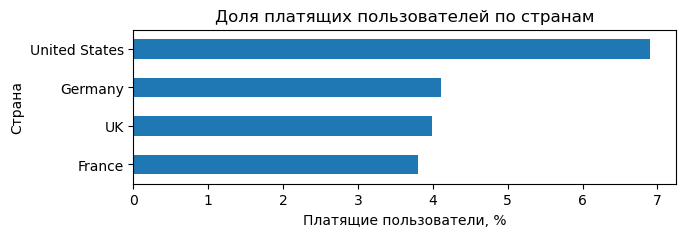

In [26]:
countries['payers_ratio'].sort_values().plot(figsize=(7, 2), kind='barh')
plt.title('Доля платящих пользователей по странам')
plt.xlabel('Платящие пользователи, %')
plt.ylabel('Страна')
plt.legend().set_visible(False);

В США самый высокий процент платящих пользователей, хотя и общее количество пользователей в этом регионе в разы превышает количество пользователей в других регионах. Однако все остальные регионы демонстрируют примерно одинаковые доли плательщиков, поэтому сложно сделать предположение о влиянии региона на количество платящих пользователей.

Рассмотрим, какие устройства наиболее популярны у платящих пользователей.

In [27]:
devices = profiles.pivot_table(index='device', values='user_id', aggfunc='count')
devices.columns = ['users_count']
#devices

In [28]:
devices_payers = payers.pivot_table(index='device', values='user_id', aggfunc = 'count')
devices_payers.columns = ['payers_count']
#devices_payers

In [29]:
devices = devices.merge(devices_payers, on='device', how='left')
#devices

In [30]:
devices['payers_ratio'] = devices['payers_count'] / devices['users_count'] * 100
devices.sort_values(by='payers_ratio', ascending=False)

,users_count,payers_count,payers_ratio
device,,,
Mac,30042,1912,6.364423
iPhone,54479,3382,6.207897
Android,35032,2050,5.851793
PC,30455,1537,5.046790


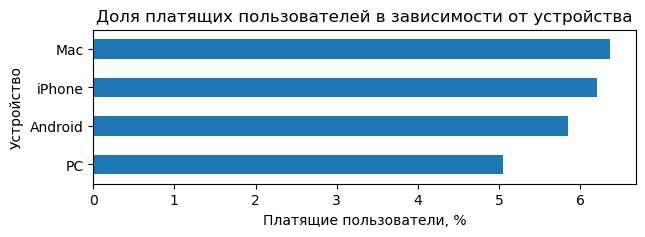

In [31]:
devices['payers_ratio'].sort_values().plot(figsize=(7, 2), kind='barh')
plt.title('Доля платящих пользователей в зависимости от устройства')
plt.xlabel('Платящие пользователи, %')
plt.ylabel('Устройство')
plt.legend().set_visible(False);

Самый низкий процент платящих пользователей - у ПК. <br>
Самая высокая (примерно одинаковая) доля платящих у Mac и iPhone, что вполне закономерно, учитывая, что наибольшее количество платящих пользователей приходитсч на США.<br>
Чуть ниже процент платящих у Android.

Посмотрим, как зависит доля платящих пользователей от канала привлечения.

In [32]:
channels = profiles.pivot_table(index='channel', values='user_id', aggfunc='count')
channels.columns = ['users_count']
#channels

In [33]:
channels_payers = payers.pivot_table(index='channel', values='user_id', aggfunc='count')
channels_payers.columns = ['payers_count']
#channels_payers

In [34]:
channels = channels.merge(channels_payers, on='channel', how='left')
#channels

In [35]:
channels['payers_ratio'] = channels['payers_count'] / channels['users_count'] * 100
channels.sort_values(by='payers_ratio', ascending=False)

,users_count,payers_count,payers_ratio
channel,,,
FaceBoom,29144,3557,12.204914
AdNonSense,3880,440,11.340206
lambdaMediaAds,2149,225,10.469986
TipTop,19561,1878,9.600736
RocketSuperAds,4448,352,7.913669
WahooNetBanner,8553,453,5.296387
YRabbit,4312,165,3.826531
MediaTornado,4364,156,3.574702
LeapBob,8553,262,3.063253


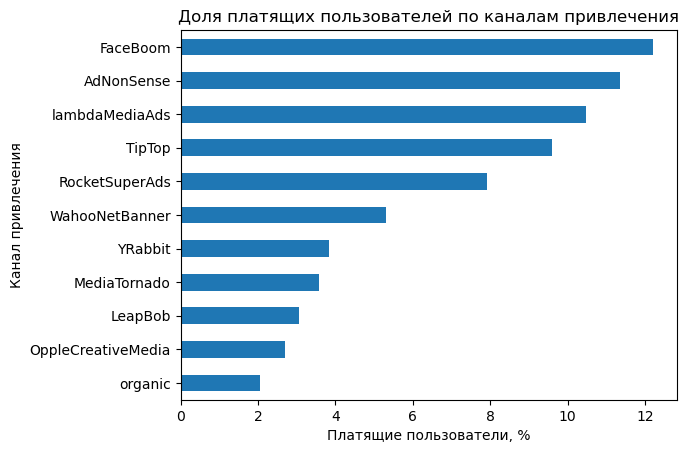

In [36]:
channels['payers_ratio'].sort_values().plot(kind='barh')
plt.title('Доля платящих пользователей по каналам привлечения')
plt.xlabel('Платящие пользователи, %')
plt.ylabel('Канал привлечения')
plt.legend().set_visible(False);

Самые большие доли платящих пользователей привлекают такие каналы как FaceBoom, AdNonSense и lambdaMediaAds. <br>
Также неплохие показатели у RocketSuperAds и WahooNetBanner.<br>
Остальные каналы привлечения пользователей показывают результаты ниже 4%.

### Вывод. <br>
**Самые лучшие показатели по привлечению платящих пользователей - в США, на устройствах Mac и iPhone, привлечённых с помощью каналов FaceBoom, AdNonSense, lambdaMediaAds и TipTop. <br>
Наименее эффективно реклама работает в Великобритании и Франции, на ПК, из каналов OppleCreativeMedia, LeapBob, MediaTornado и YRabbit.**

## 4. Маркетинг

Рассчитаем общую сумму расходов на маркетинг.

In [37]:
sum_costs = profiles['acquisition_cost'].sum()
display('Общая сумма расхоов на маркетинг составила', sum_costs)

'Общая сумма расхоов на маркетинг составила'

105497.29999999999

Рассмотрим распределение трат на рекламу по источникам.

In [38]:
channel_costs = profiles.pivot_table(index= 'channel', values='acquisition_cost', aggfunc='sum')
channel_costs.columns = ['channel_cost']
channel_costs.sort_values(by='channel_cost', ascending=False)

,channel_cost
channel,
TipTop,54751.30
FaceBoom,32445.60
WahooNetBanner,5151.00
AdNonSense,3911.25
OppleCreativeMedia,2151.25
RocketSuperAds,1833.00
LeapBob,1797.60
lambdaMediaAds,1557.60
MediaTornado,954.48


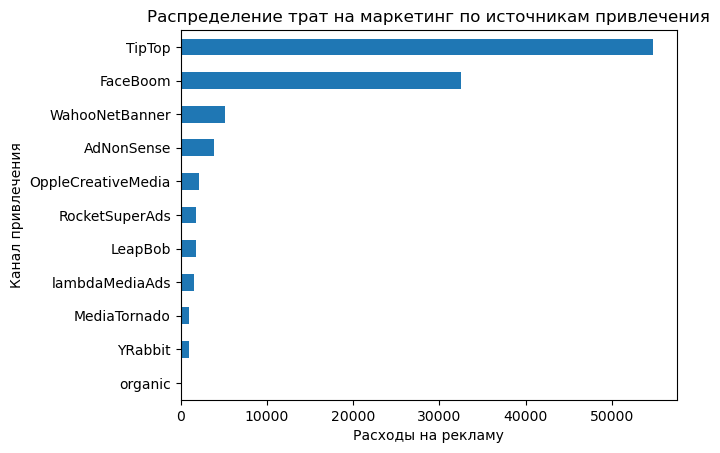

In [39]:
channel_costs['channel_cost'].sort_values().plot(kind='barh')
plt.title('Распределение трат на маркетинг по источникам привлечения')
plt.xlabel('Расходы на рекламу')
plt.ylabel('Канал привлечения')
plt.legend().set_visible(False);

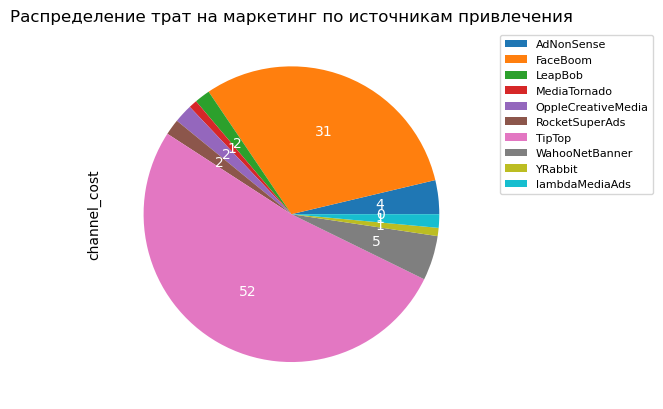

In [40]:
channel_costs.plot(kind='pie', y = 'channel_cost', autopct = '%.0f', textprops=dict(color='w'))
plt.title('Распределение трат на маркетинг по источникам привлечения')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', prop={'size': 8});

По графику видно, что затраты на рекламу по двум источникам привлечения (TipTop и FaceBoom) в разы превышают затраты по остальным источникам привлечения. Необходим дополнительный анализ расходов на рекламу.

Рассмотрим динамику изменения расходов на рекламу понедельно и помесячно.

In [41]:
profiles['week'] = profiles['first_ts'].dt.isocalendar().week

In [42]:
profiles_week = profiles.pivot_table(index='week', columns='channel', values='acquisition_cost', aggfunc='sum')
profiles_week.head()

channel,AdNonSense,FaceBoom,LeapBob,MediaTornado,OppleCreativeMedia,RocketSuperAds,TipTop,WahooNetBanner,YRabbit,lambdaMediaAds,organic
week,,,,,,,,,,,
18,211.05,535.7,16.80,38.64,24.00,99.450,347.0,49.2,52.2,81.6,0.0
19,273.00,750.2,31.71,61.68,34.50,139.230,470.0,92.4,75.9,103.2,0.0
20,265.65,755.7,26.67,59.04,27.50,138.060,454.0,90.0,69.3,90.4,0.0
21,266.70,722.7,26.67,50.16,34.25,131.040,801.8,79.2,65.4,119.2,0.0
22,202.65,1208.9,65.52,36.96,81.75,97.695,1421.2,179.4,49.8,83.2,0.0


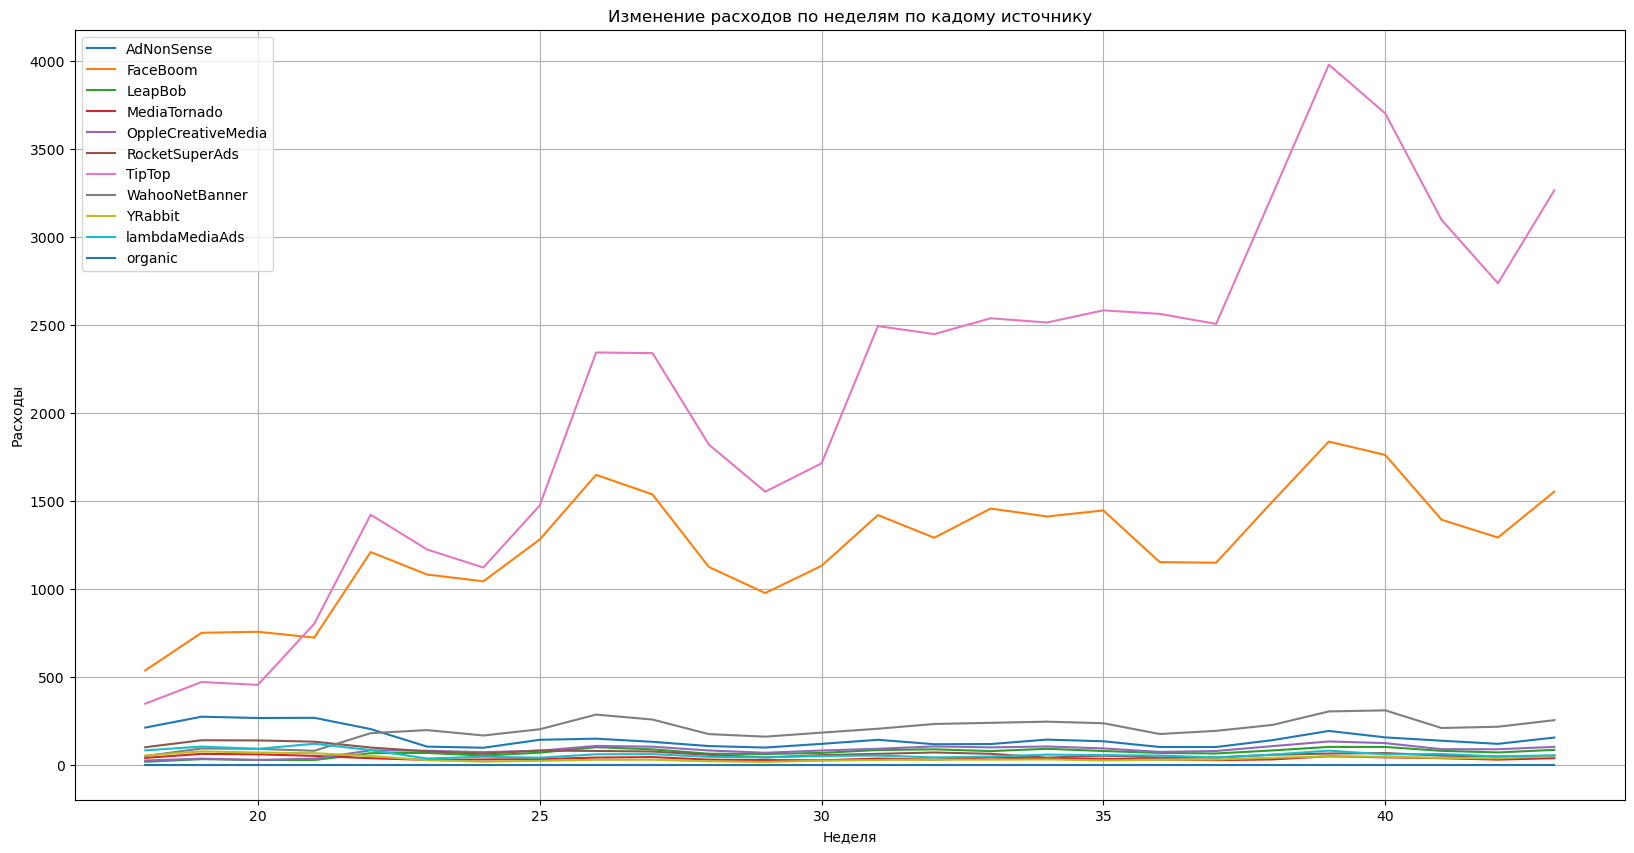

In [43]:
profiles_week.plot(grid=True, figsize=(20,10))
plt.title('Изменение расходов по неделям по кадому источнику')
plt.xlabel('Неделя')
plt.ylabel('Расходы')
plt.legend();

In [44]:
profiles_month = profiles.pivot_table(index='month', columns='channel', values='acquisition_cost', aggfunc='sum')
profiles_month.head()

channel,AdNonSense,FaceBoom,LeapBob,MediaTornado,OppleCreativeMedia,RocketSuperAds,TipTop,WahooNetBanner,YRabbit,lambdaMediaAds,organic
month,,,,,,,,,,,
2019-05-01,1169.70,3524.4,140.28,238.56,169.75,577.980,2981.0,418.8,299.70,458.4,0.0
2019-06-01,538.65,5501.1,314.58,138.00,370.00,325.715,6675.6,921.0,106.20,199.2,0.0
2019-07-01,504.00,5294.3,313.53,138.48,366.50,252.070,8410.2,851.4,97.38,219.2,0.0
2019-08-01,579.60,6274.4,369.81,154.56,439.25,253.110,11202.0,1040.4,124.74,220.0,0.0
2019-09-01,581.70,6114.9,343.98,144.72,427.75,218.400,13232.5,977.4,152.79,247.2,0.0


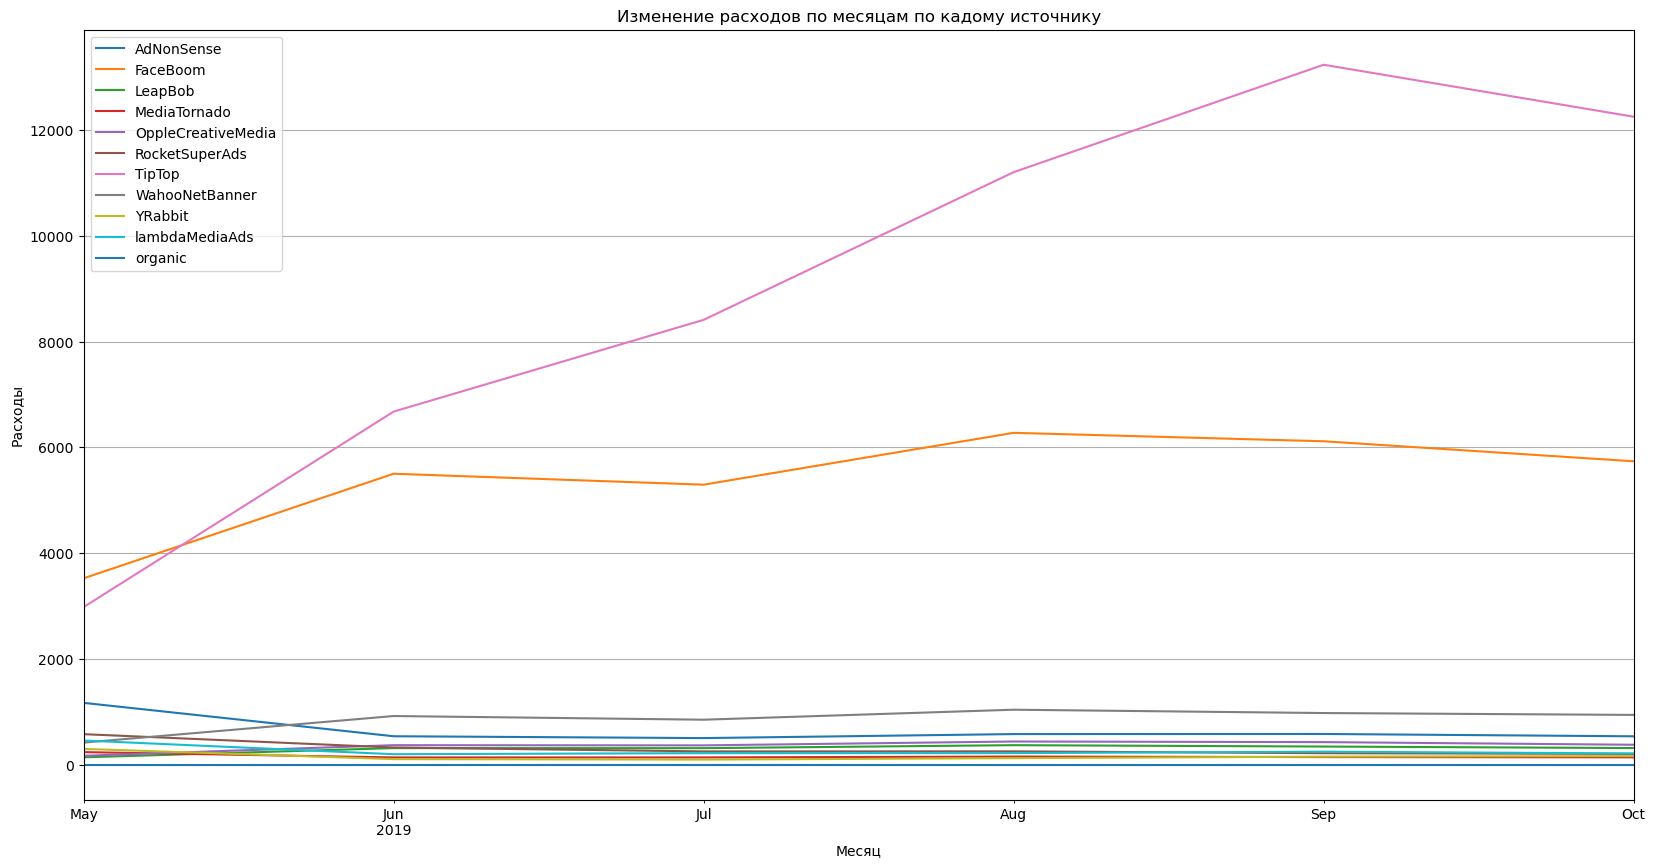

In [45]:
profiles_month.plot(grid=True, figsize=(20,10))
plt.title('Изменение расходов по месяцам по кадому источнику')
plt.xlabel('Месяц')
plt.ylabel('Расходы')
plt.legend();

Судя по графикам затраты на все каналы привлечения стабильны, кроме двух каналов - TipTop и FaceBoom. особенно значительный рос показвает TipTop - расходы на это канал выросли в несколько раз за период исследования.

In [46]:
channel_users = profiles.pivot_table(index='channel', values='user_id', aggfunc='count')
channel_users.columns = ['channel_users_count']
#channel_users

In [47]:
channel_costs = channel_costs.merge(channel_users, on='channel', how='left')
channel_costs['CAC'] = channel_costs['channel_cost'] / channel_costs['channel_users_count']
channel_costs.sort_values(by='CAC')

,channel_cost,channel_users_count,CAC
channel,,,
organic,0.00,56439,0.000000
LeapBob,1797.60,8553,0.210172
MediaTornado,954.48,4364,0.218717
YRabbit,944.22,4312,0.218975
OppleCreativeMedia,2151.25,8605,0.250000
RocketSuperAds,1833.00,4448,0.412095
WahooNetBanner,5151.00,8553,0.602245
lambdaMediaAds,1557.60,2149,0.724802
AdNonSense,3911.25,3880,1.008054


In [48]:
mean_cac = channel_costs['CAC'].mean()
display('Среднее значение CAC по всем каналам составляет', mean_cac)

'Среднее значение CAC по всем каналам составляет'

0.6870317251013996

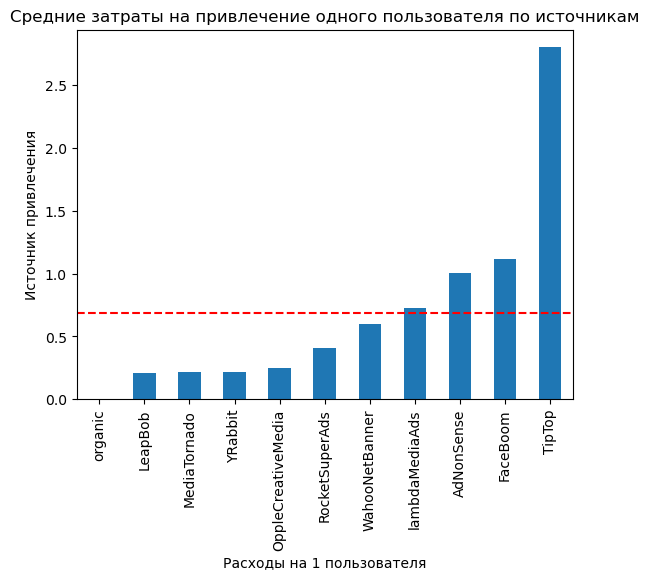

In [49]:
channel_costs['CAC'].sort_values().plot(kind='bar')
plt.title('Средние затраты на привлечение одного пользователя по источникам')
plt.xlabel('Расходы на 1 пользователя')
plt.ylabel('Источник привлечения')
plt.axhline(y = mean_cac, color='red', linestyle='--')
plt.legend().set_visible(False)
plt.show();

### Вывод. <br>
**Как показывает анализ, самыми затратными стали такие источники как TipTop и FaceBoom. <br>
Эти исочники являются самыми затратными не только в абсолютном выражении, но также и в расчёте затрат на привлечение одного пользователя. <br>
Кроме того, источник TipTop показывал рост затрат практически в течение всего периода. <br>
Стоит проанализировать, окупаются ли эти затраты.**

## 5. Оценка окупаемости рекламы

Для оценки окупаемости рекламы установим момент и горизонт анализа данных.

In [50]:
observation_date = datetime(2019, 11, 1).date()
horizon_days = 14

Сначала оценим общую окупаемость рекламы.

Для оценки окупаемости исключим из расчётов пользователей с органическим трафиком, так как этот канал бесплатный.

In [51]:
profiles_without_organic = profiles[profiles['channel'] != 'organic']

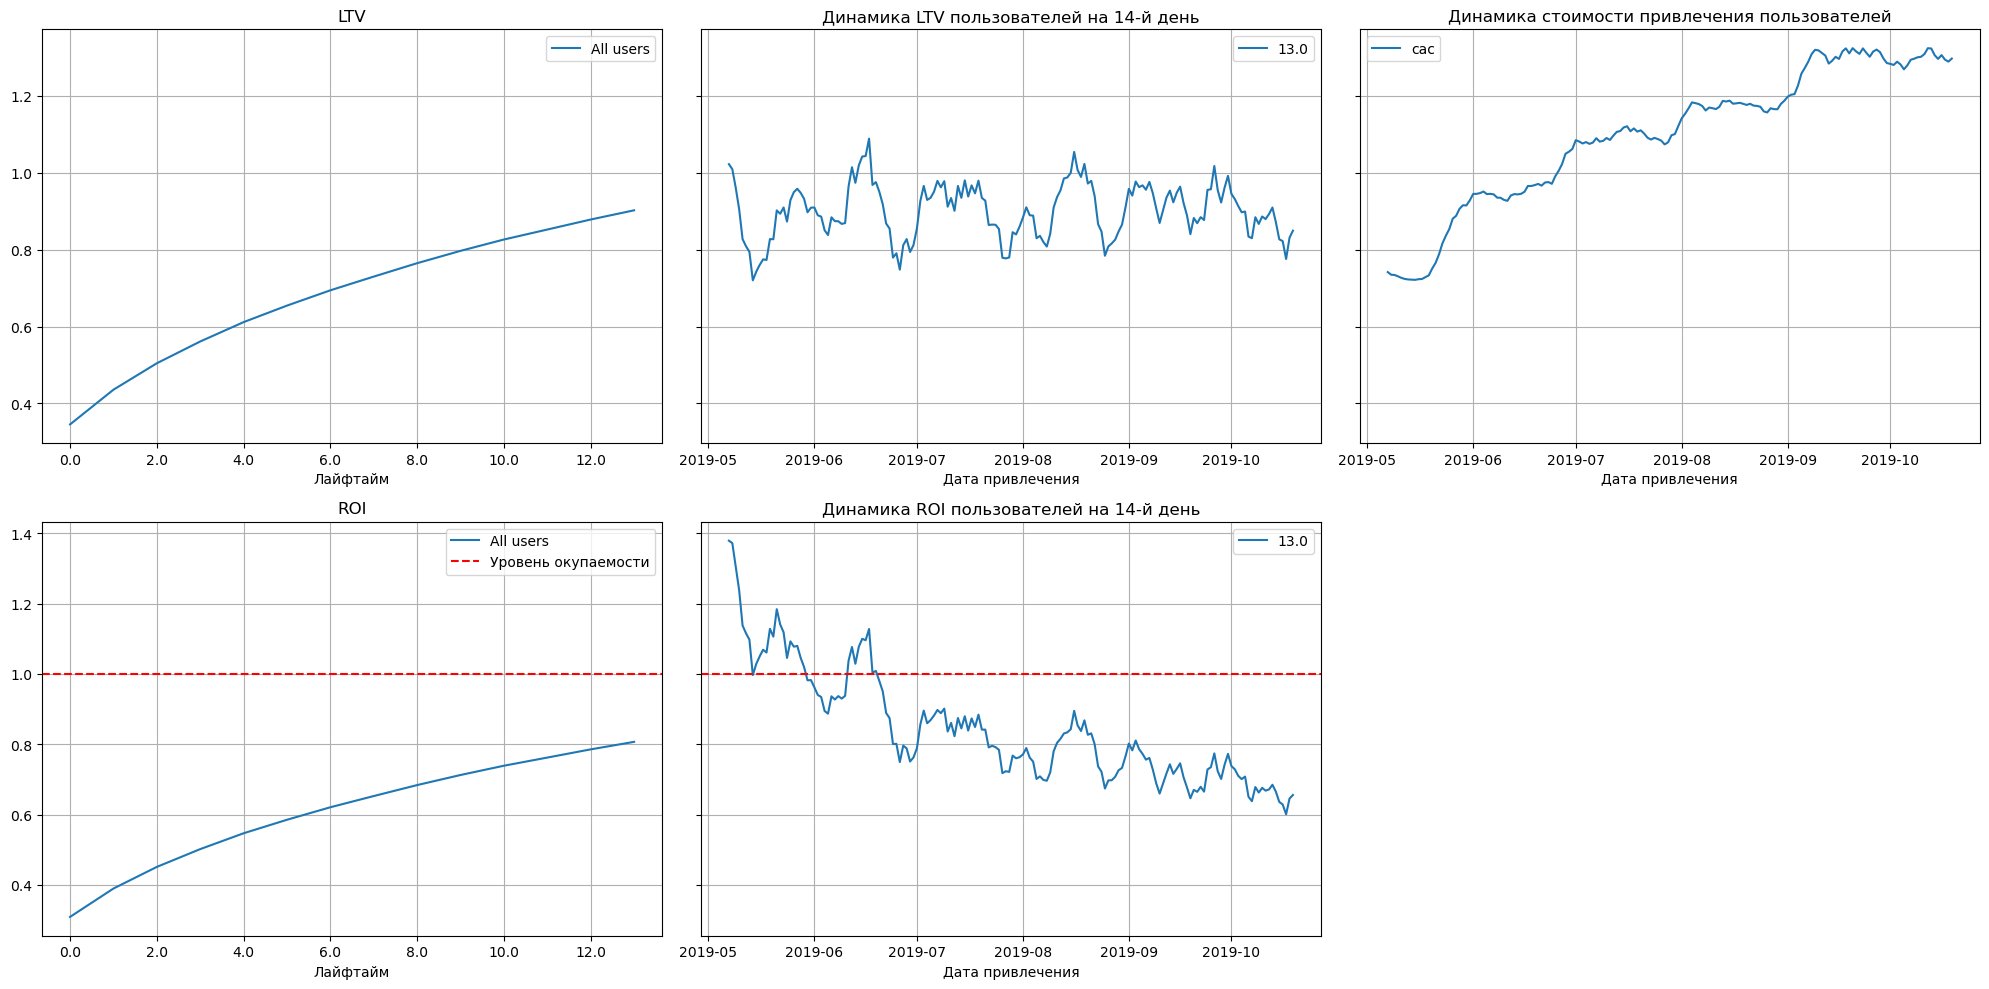

In [52]:
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
profiles_without_organic, orders, observation_date, horizon_days)
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days)

На графиках видны явные проблемы с окупаемостью рекламы. <br>
Показатель LTV достаточно стабилен. <br>
ROI к концу второй недели достигает лишь 80%, а динамика ROI и вовсе показывает постоянное снижение окупаемости, что очевидно связано с постоянным ростом стоимости привлечения новых пользователей (CAC). <br>
Необходимо проанализировать все характеристики пользователей, чтобы найти причину убыточности.  

Рассмотрим окупаемость рекламы с разбивкой по странам.

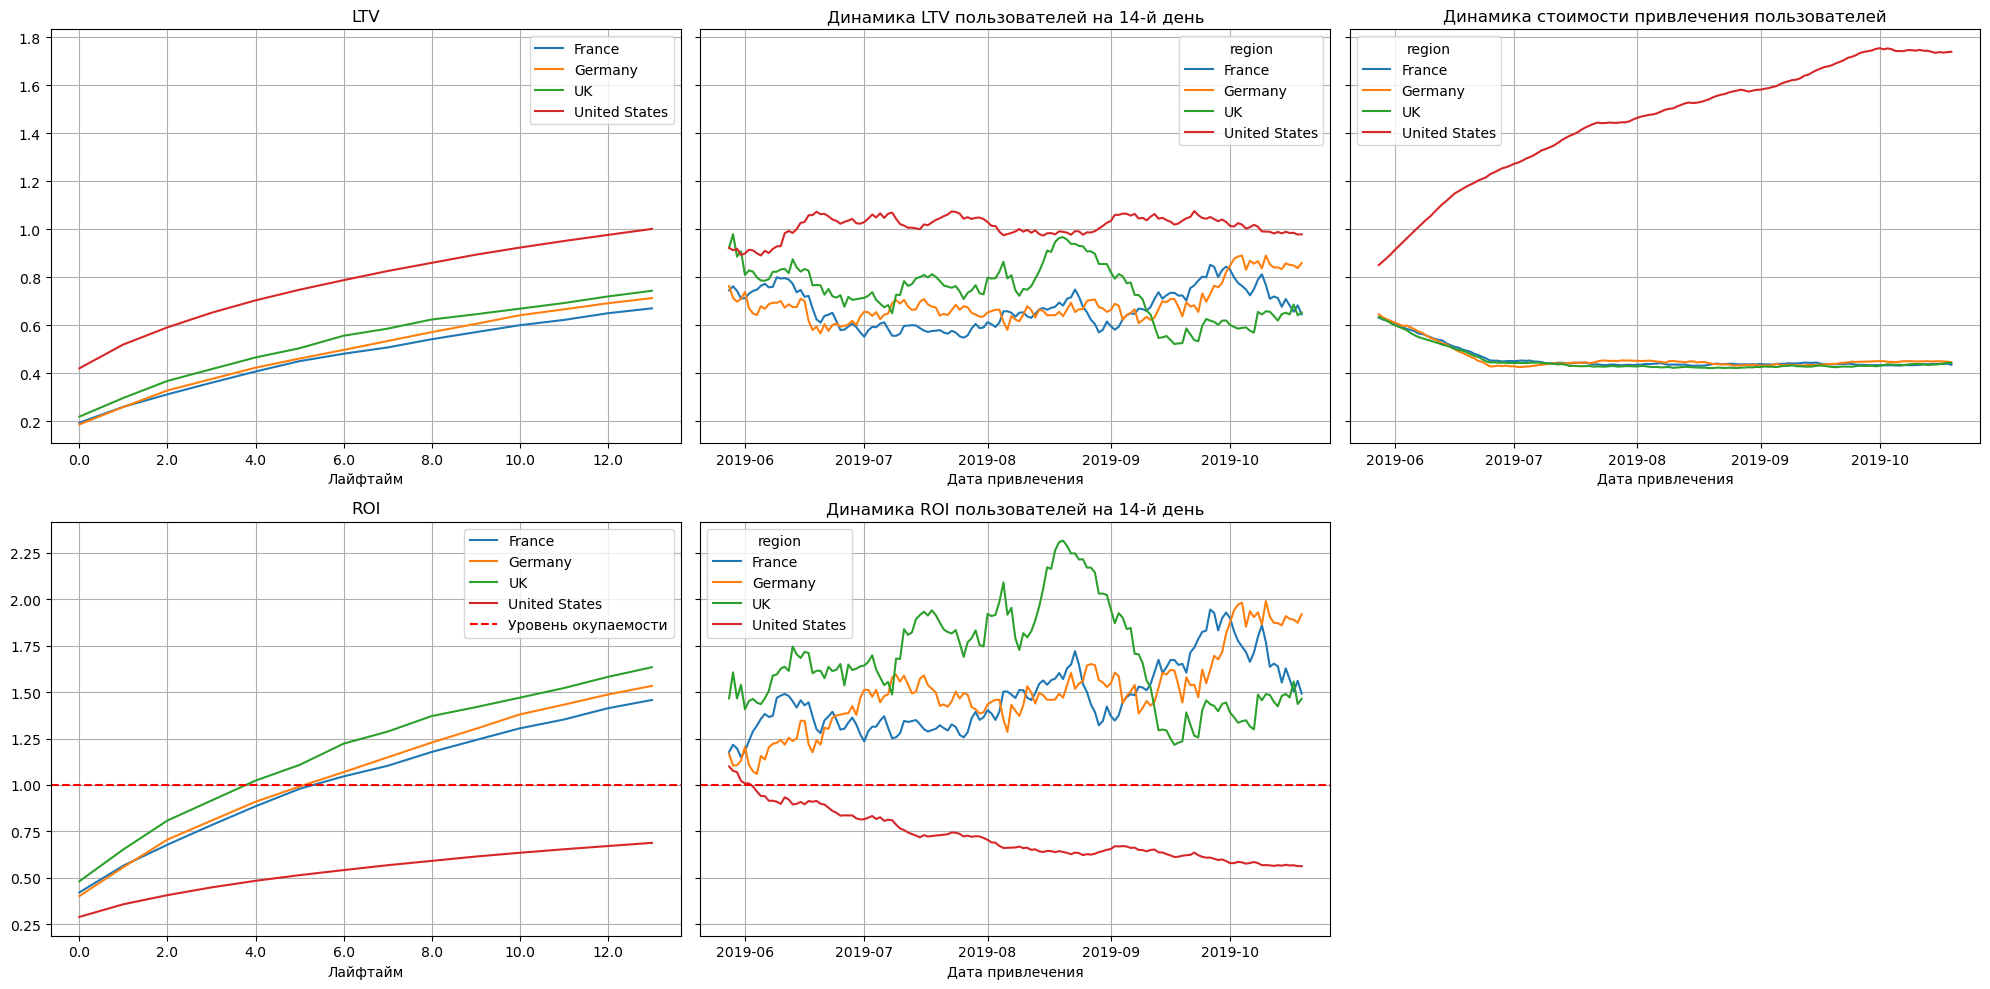

In [53]:
dimensions = ['region']
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles_without_organic, orders, observation_date, horizon_days, dimensions=dimensions)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=28) 

По графикам видно, что несмотря на то, что показатель LTV для США самый высокий, этоединственный регион, в котором реклама не окупается. <br>
Стоимость привлечения пользователей в США в разы превышает аналогичный показатель в других регионах и постоянно растёт. <br>
Соответственно ROI идёт на спад, в зону неокупаемости.

Изучим подробнее рекламу в США.

In [54]:
profiles_usa = profiles_without_organic[profiles_without_organic['region'] == 'United States']
profiles_usa['region'].unique()

array(['United States'], dtype=object)

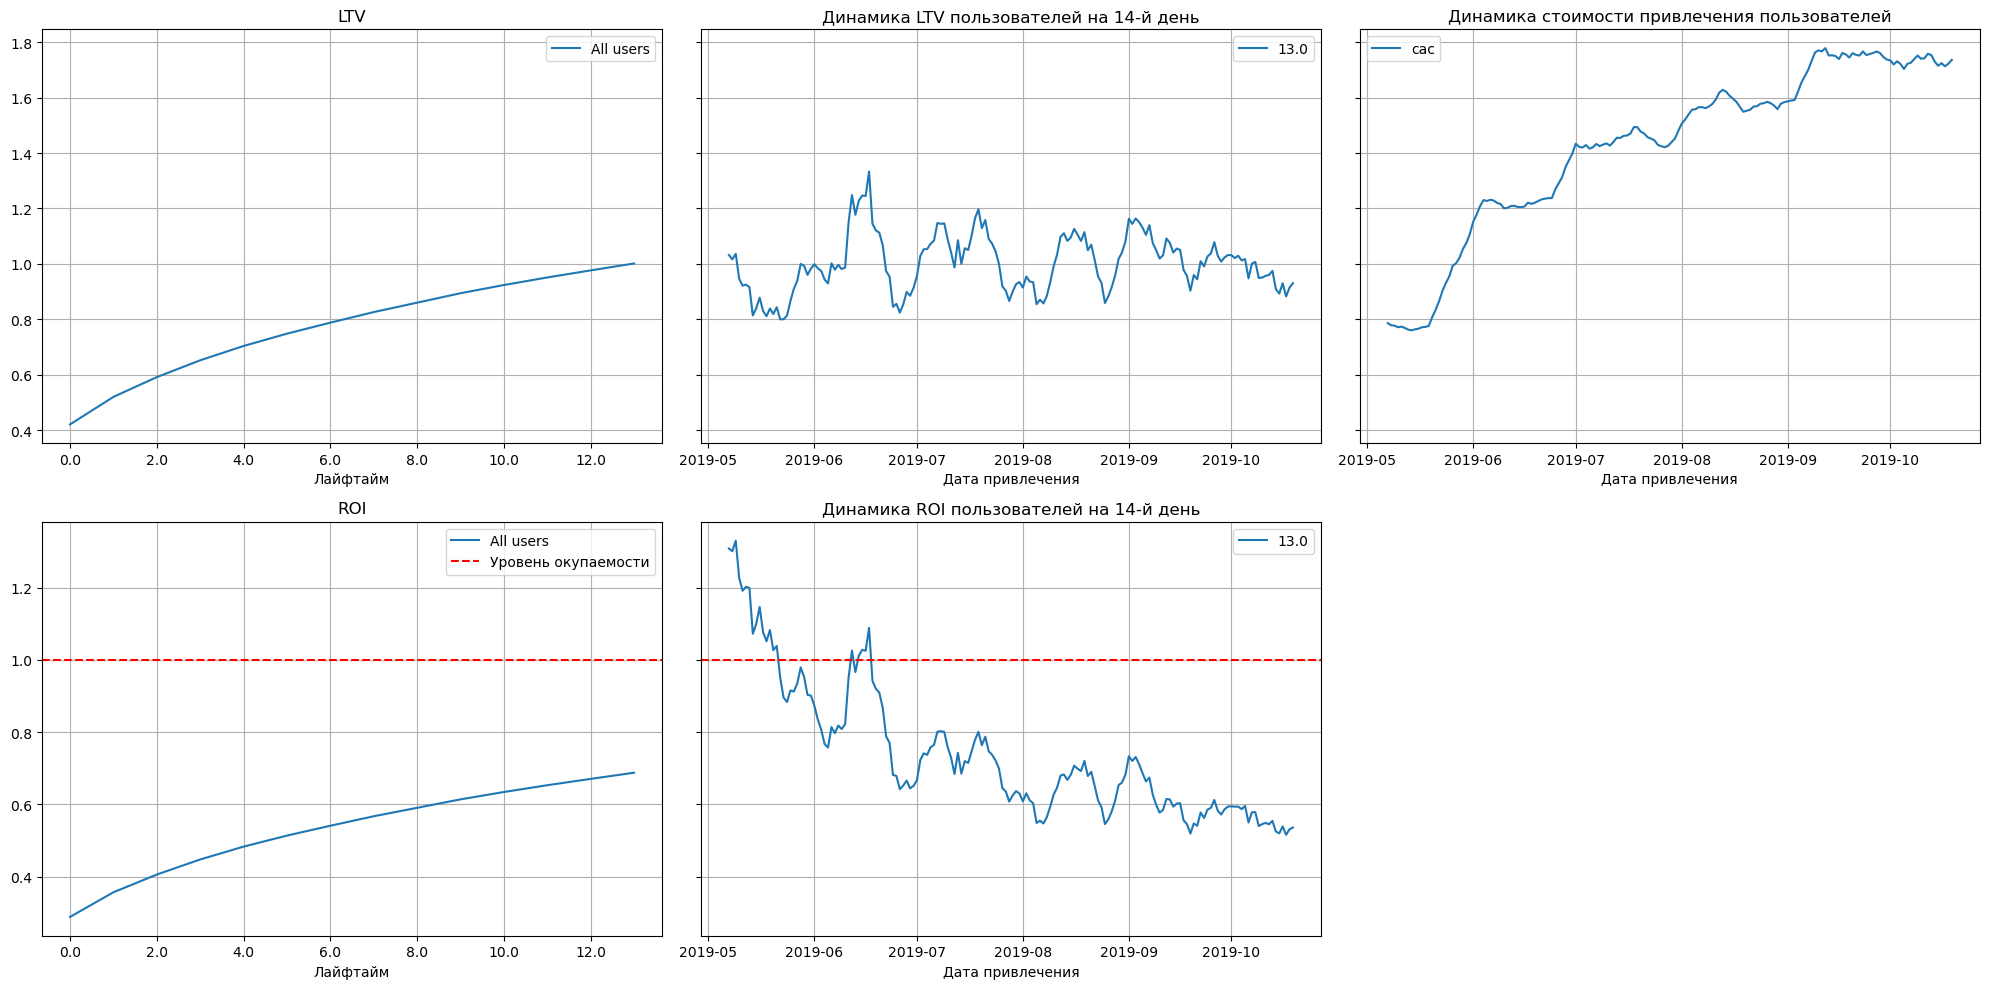

In [55]:
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
profiles_usa, orders, observation_date, horizon_days)
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days)

Графики окупаемости рекламы для США полность повторяют силуэт графиков окупаемости в общем. Логично предположить, что именно этот регион тянет компанию на дно.

In [56]:
profiles_usa['channel'].unique()

array(['FaceBoom', 'YRabbit', 'MediaTornado', 'RocketSuperAds', 'TipTop'],
      dtype=object)

В США используются самые дорогие каналы привлечения пользователей.

In [57]:
sum_costs_usa = profiles_usa['acquisition_cost'].sum()
costs_ratio = sum_costs_usa / sum_costs * 100
display('Расходы на рекламу в США составляют', sum_costs_usa)
display(costs_ratio, '% всего рекламного бюджета компании')

'Расходы на рекламу в США составляют'

90928.59999999999

86.19045226749878

'% всего рекламного бюджета компании'

Этот регион поглощает большую часть бюджета на маркетинг.

Рассмотрим влияние применяемых устройств на окупаемость рекламы.

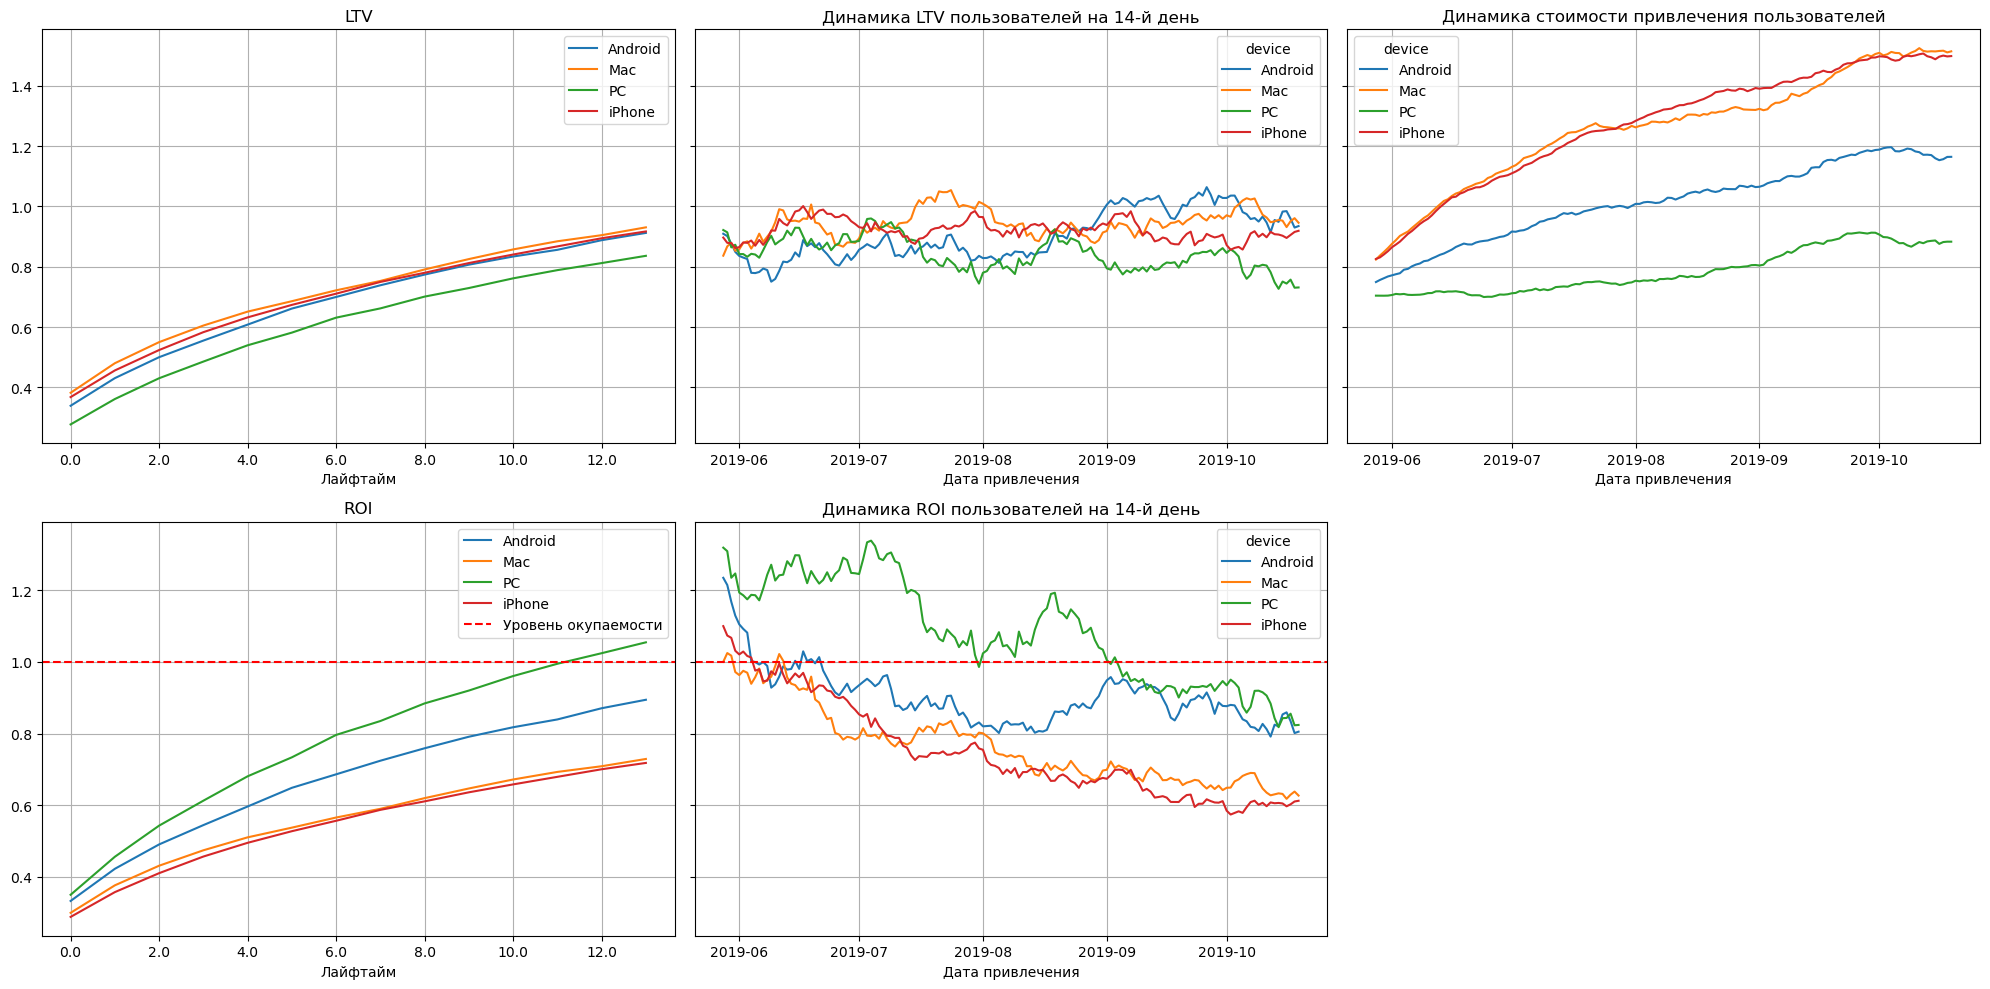

In [58]:
dimensions = ['device']
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles_without_organic, orders, observation_date, horizon_days, dimensions=dimensions)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=28) 

Показатели LTV достаточно стабильны и близки для всех типов устройств, лишь показатель LTV для ПК несколько ниже остальных. <br>
Однако окупаемость рекламы для ПК выше других из-за самой низкой стоимости привлечения пользователей. Это единственное устройство, показатель окупаемости которого к концу второй недели превышает 100%. Однако динамика окупаемости показывает снижение в течение всего периода.<br>
Самые низкие показатели окупаемости рекламы у iPhone и Mac, как и самые высокие показатели по стоимости привлечия новых пользователей. <br>
Это вполне коррелирует с данными по окупаемости в различных странах, ведь в США применяют в основном именно эти устройства.

Рассмотрим, как меняется окупаемость рекламы в зависимости от канала привлечения пользователей.

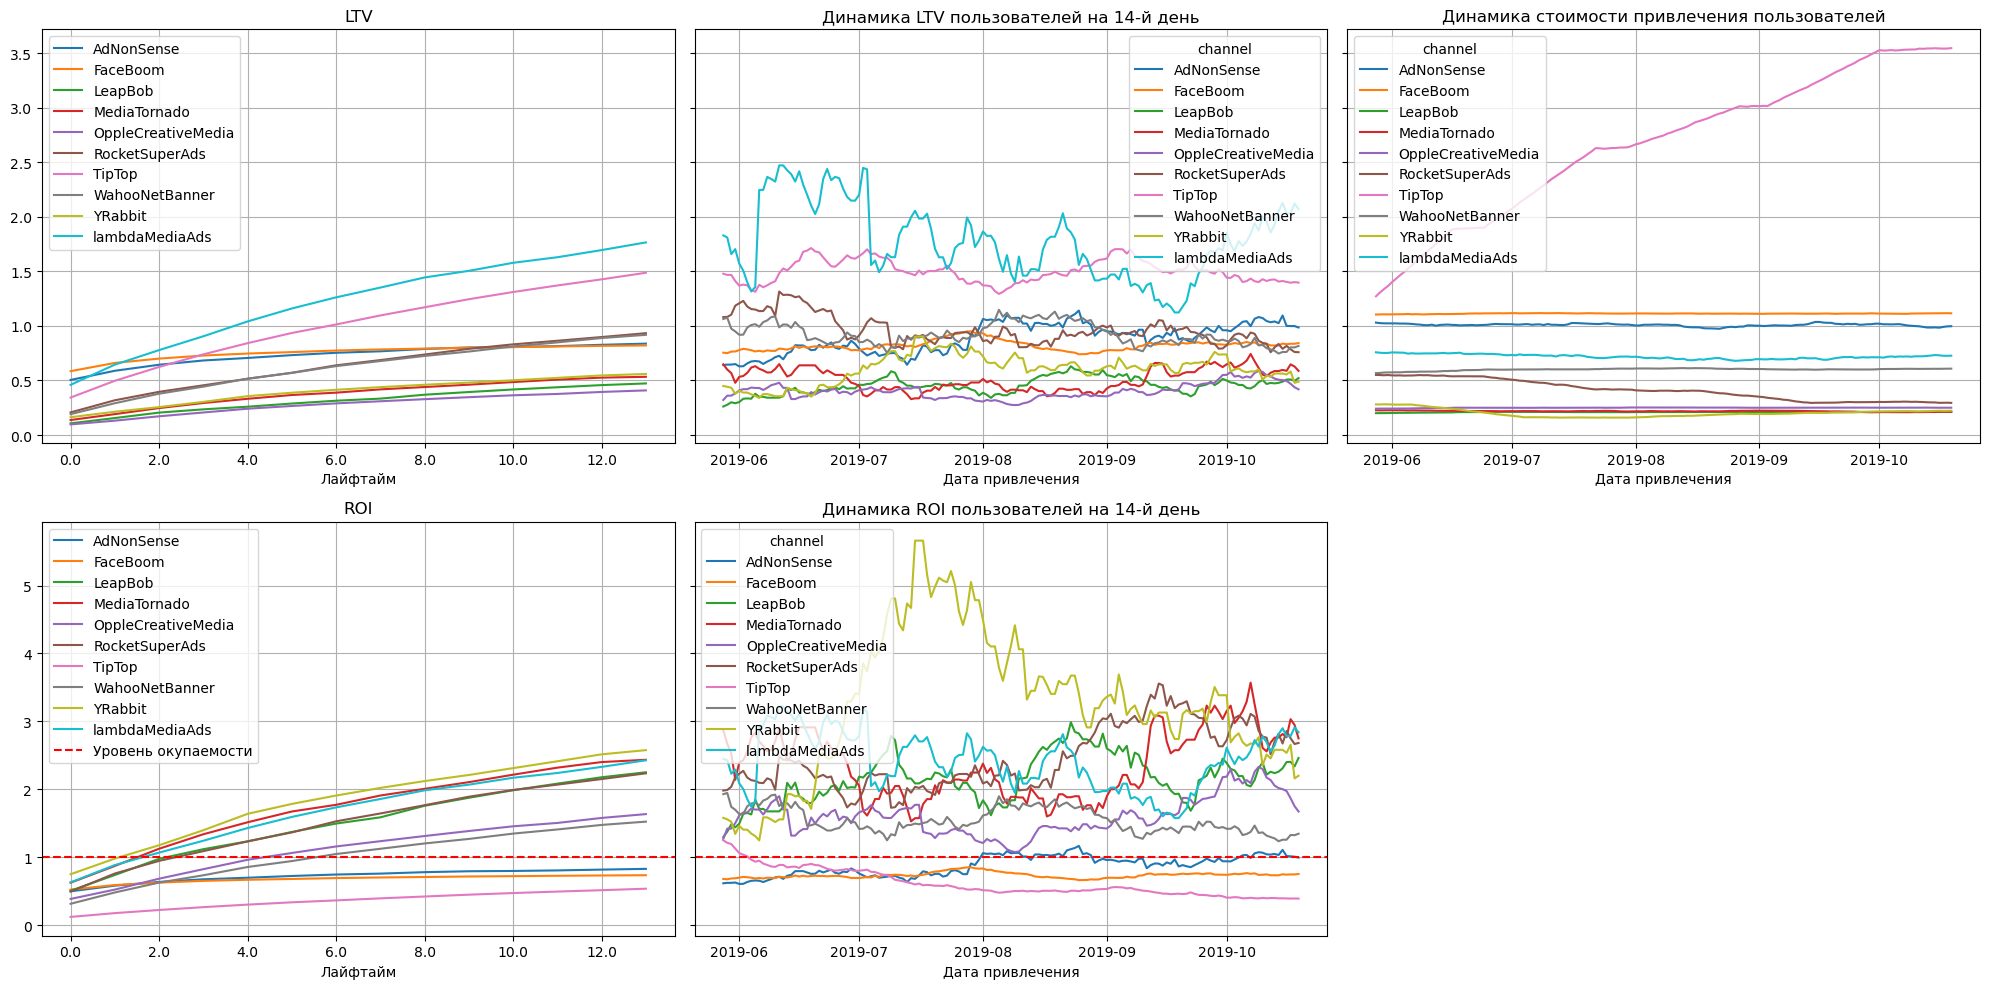

In [59]:
dimensions = ['channel']
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles_without_organic, orders, observation_date, horizon_days, dimensions=dimensions)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=28) 

Показатель LTV досточно стабилен для всех каналов привлечения, однако стоит отметить наиболее высокие значения для каналов lambdaMediaAds и TipTop. <br>
Однако затраты на привлечение пользователей с помощью канала TipTop не окупаются. Это единственный канал, стоимость привлечения поьзователей которого постоянно растёт в течение всего периода исследования. <br>
Также в зоне неокупаемости находятся каналы FaceBoom и AdNonSense. <br>
Остальные каналы привлечения пользователей приносят доход компании - показатель ROI для них выше 100%. <br>
Самая лучшая окупаемость у канала YRabbit, однако у него не очень высокий показатель LTV. <br>
Наиболее интересным для компании может быть канал lambdaMediaAds, так как он имеет хорошую окупаемость и самый высокий показатель LTV.

Посчитаем и визуализируем конверсию.

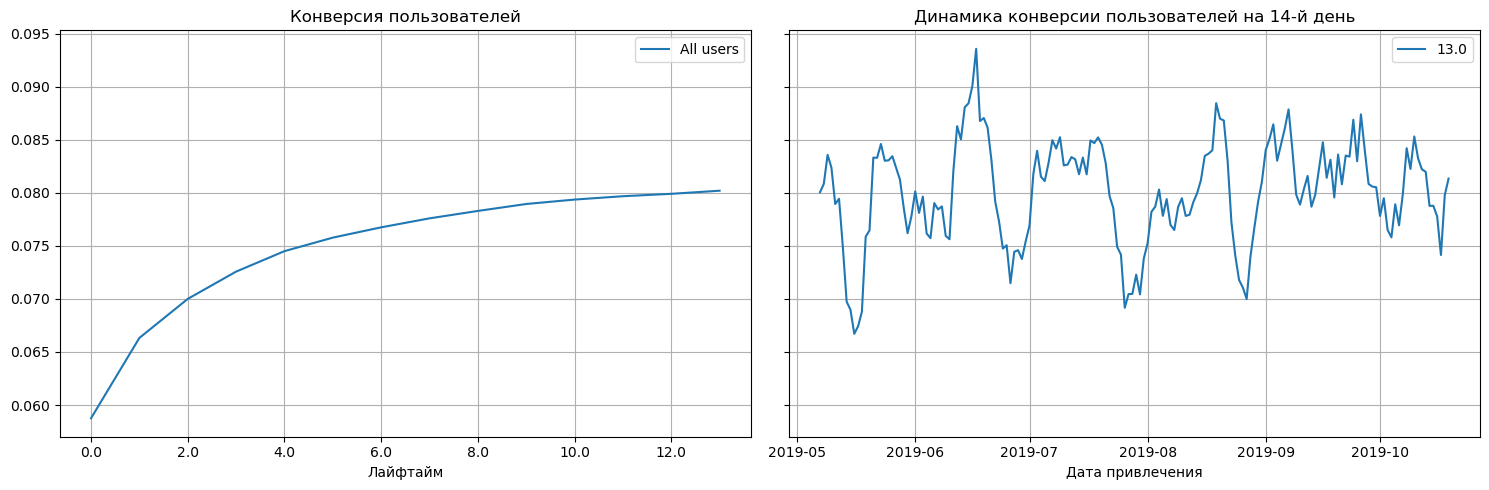

In [60]:
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles_without_organic, orders, observation_date, horizon_days)

plot_conversion(conversion_grouped, conversion_history, horizon_days)

В целом, конверия неплохая и достаточно стабильная, начиная с июня.

Посчитаем и визуализируем удержание.

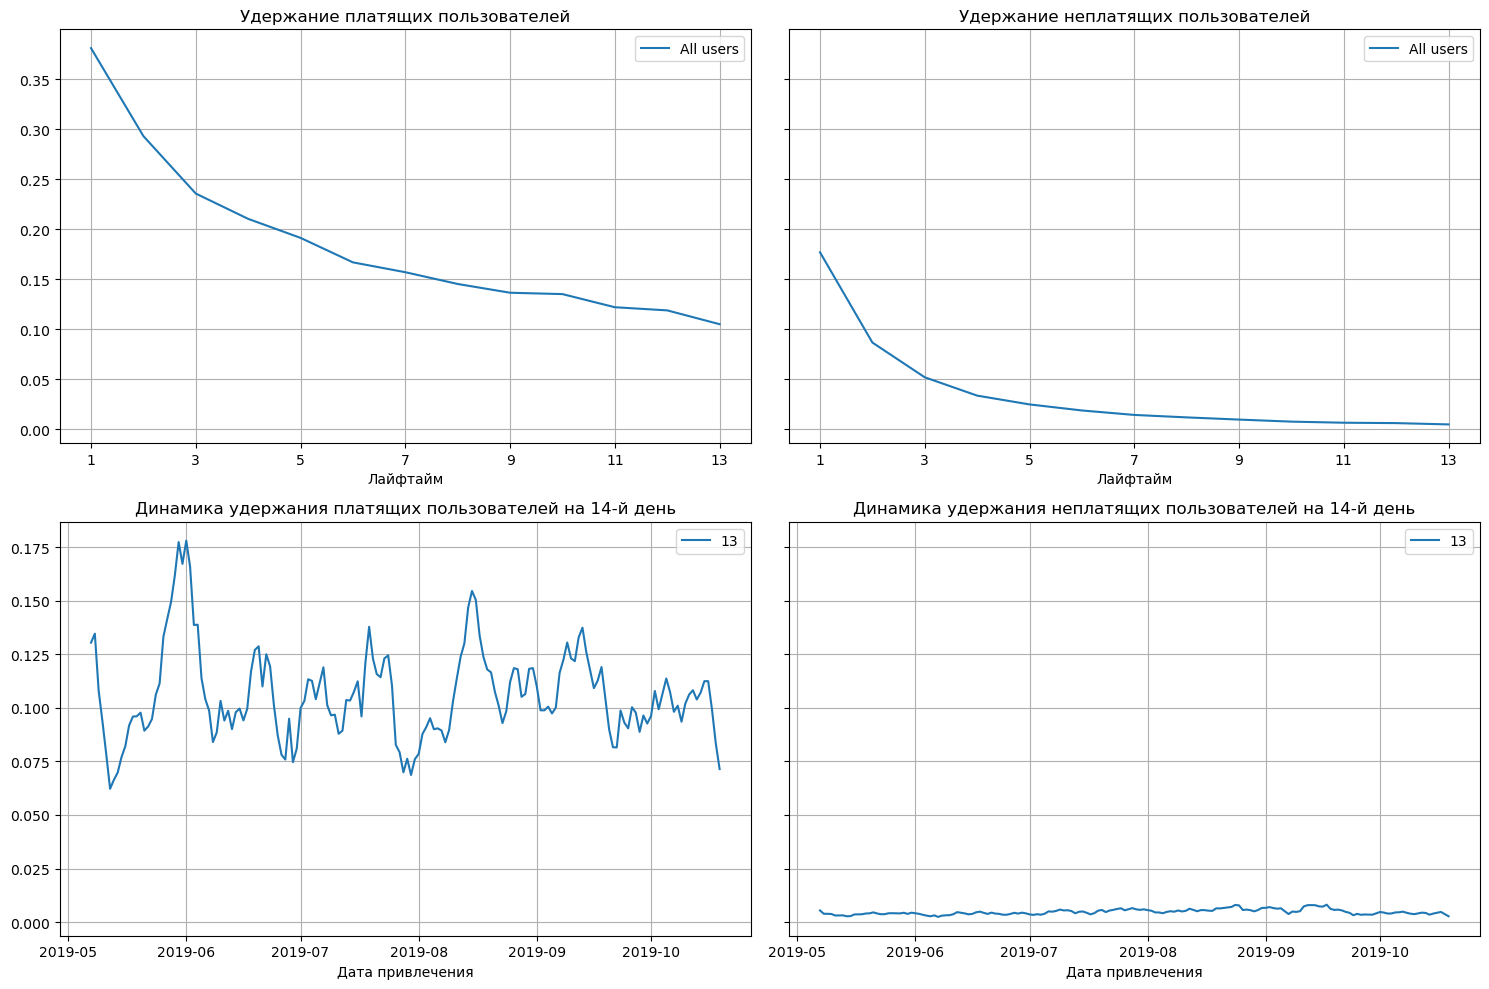

In [61]:
retention_raw, retention_grouped, retention_history = get_retention(
    profiles_without_organic, visits, observation_date, horizon_days)

plot_retention(retention_grouped, retention_history, horizon_days) 

Динамика удержания достаточно стабильная. Стабильно плохая. Процент удержания платящих пользователей итак невысокий в первый день (менее 40%) падает практически до 10% к концу второй недели. Необходимо провести дополниетльнй анализ по факторам, чтобы понять, что могло стать причиной плохого удержания пользователей.

Посчитаем и визуализируем конверсию и удержание по странам.

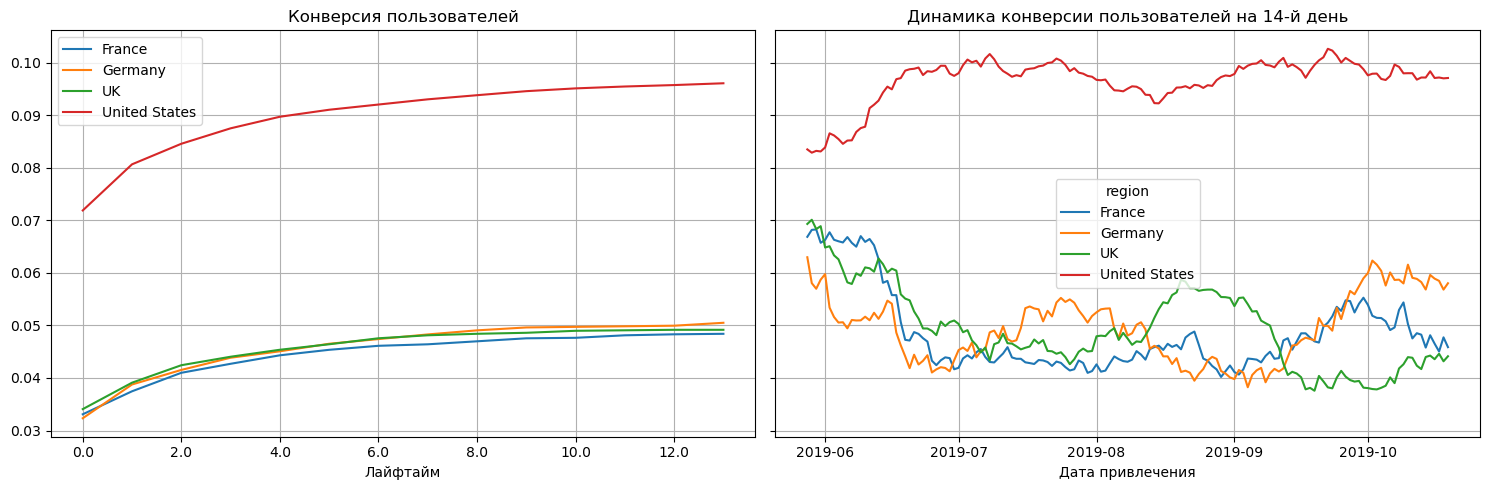

In [62]:
dimensions = ['region']
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles_without_organic, orders, observation_date, horizon_days, dimensions=dimensions)

plot_conversion(conversion_grouped, conversion_history, horizon_days, window=28)

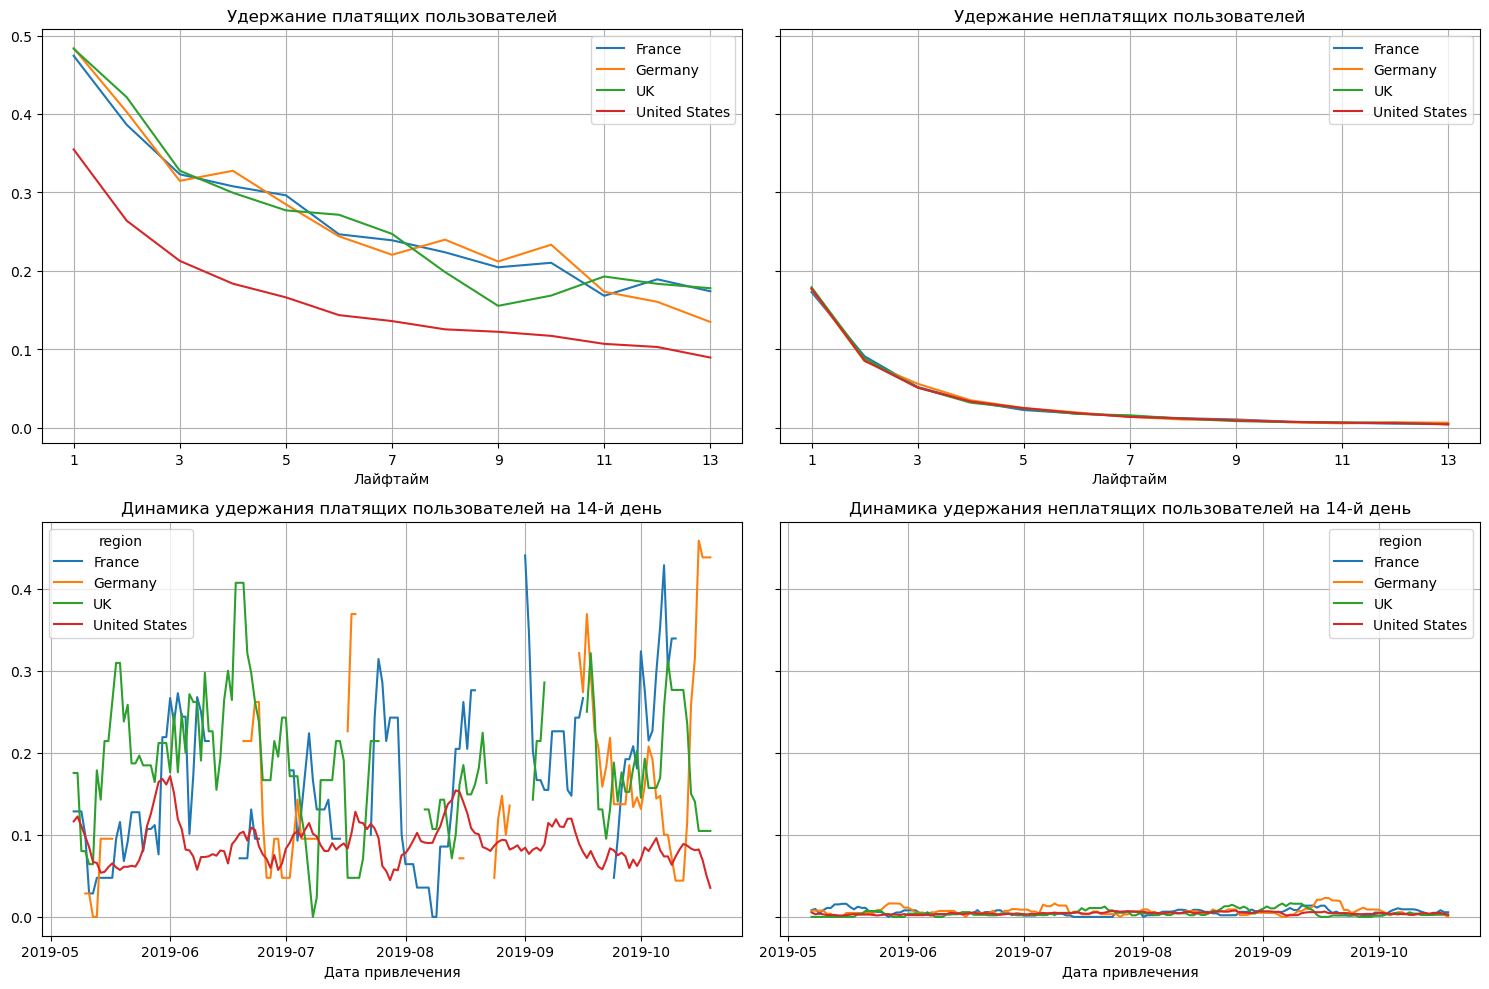

In [63]:
dimensions = ['region']
retention_raw, retention_grouped, retention_history = get_retention(
    profiles_without_organic, visits, observation_date, horizon_days, dimensions=dimensions)

plot_retention(retention_grouped, retention_history, horizon_days, window=7) 

Самая высокая конверсия наблюдается в США. Однако в этой стране и самый низкий процент удержания платящих пользователей. Динамика конверсии и удержания стабильна для всех регионов.

Посчитаем и визуализируем конверсию и удержание по типам устройств пользователей.

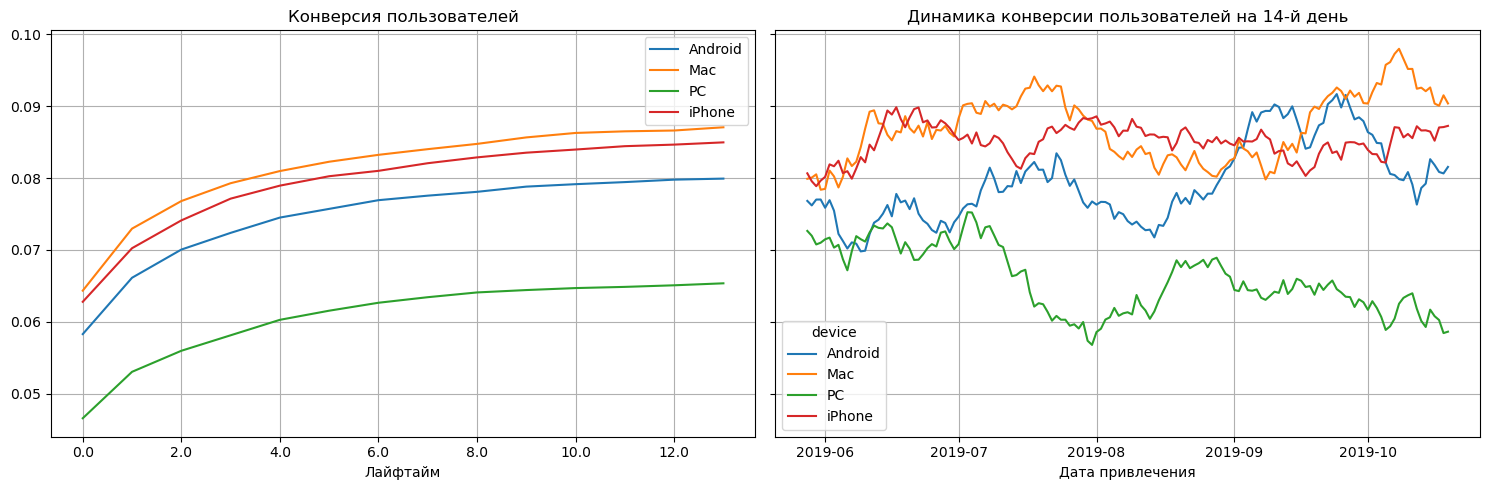

In [64]:
dimensions = ['device']
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles_without_organic, orders, observation_date, horizon_days, dimensions=dimensions)

plot_conversion(conversion_grouped, conversion_history, horizon_days, window=28)

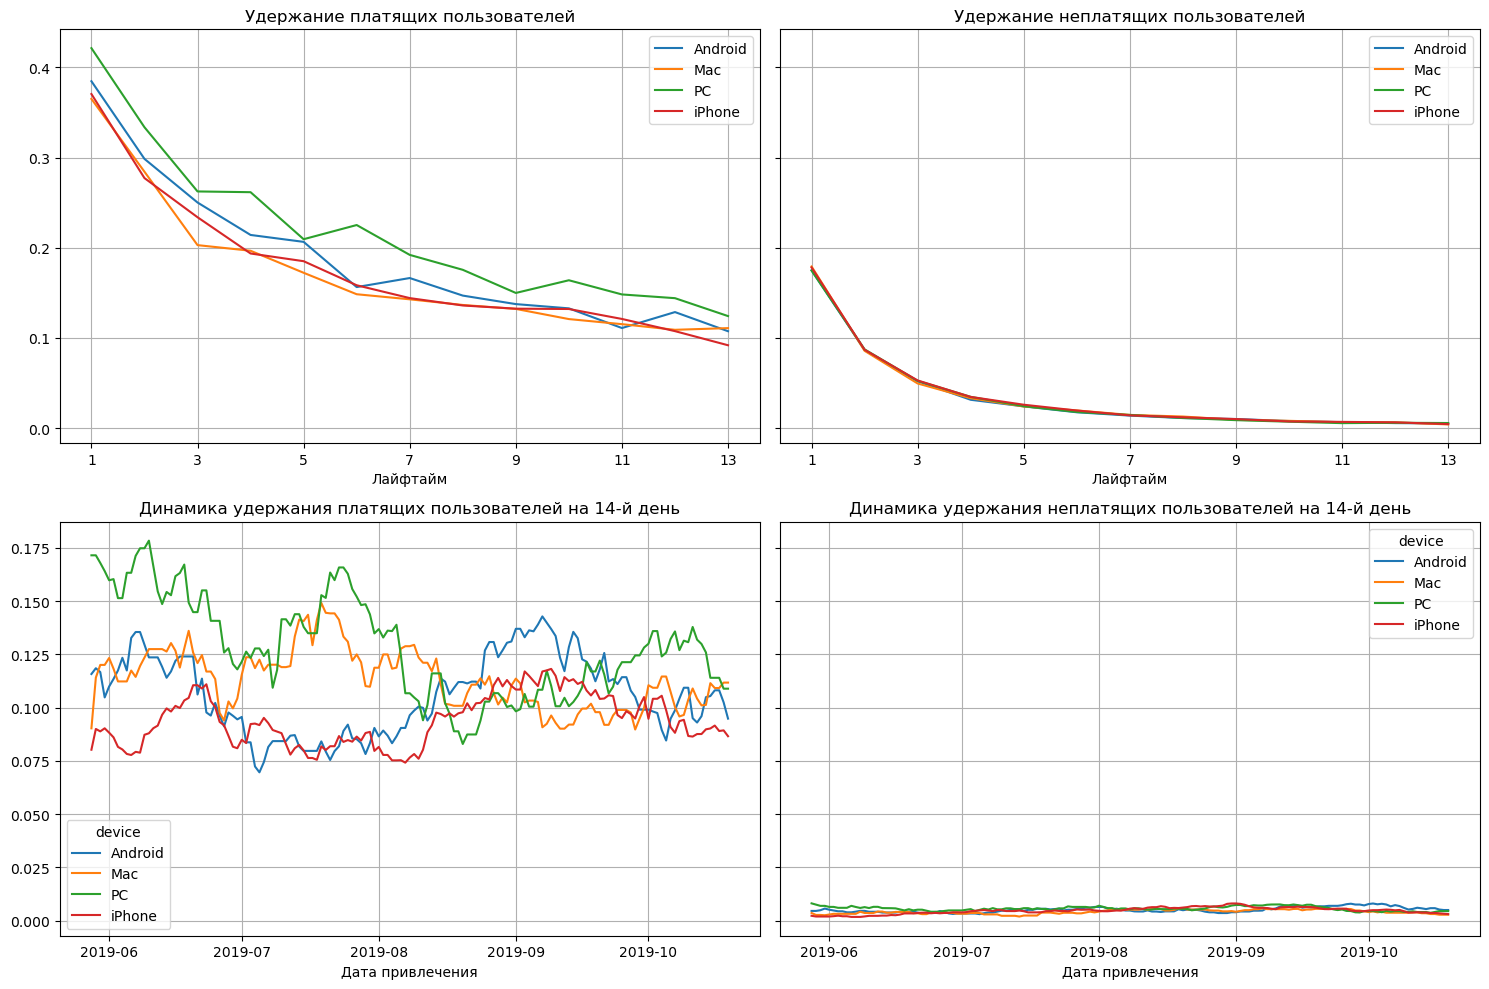

In [65]:
dimensions = ['device']
retention_raw, retention_grouped, retention_history = get_retention(
    profiles_without_organic, visits, observation_date, horizon_days, dimensions=dimensions)

plot_retention(retention_grouped, retention_history, horizon_days, window=28) 

Динамика конверсии и удержания стабильная для всех устройств. Самая высока конверсия у iPhone и Mac. Однако процент удержания на этих устройствах несколько ниже, чем на Android. <br>
Самая низкая конверсия на ПК, однако на этих устройствах самый высокий процент удержания пользователей.

Посчитаем и визуализируем конверсию и удержание по каналам привлечения пользователей.

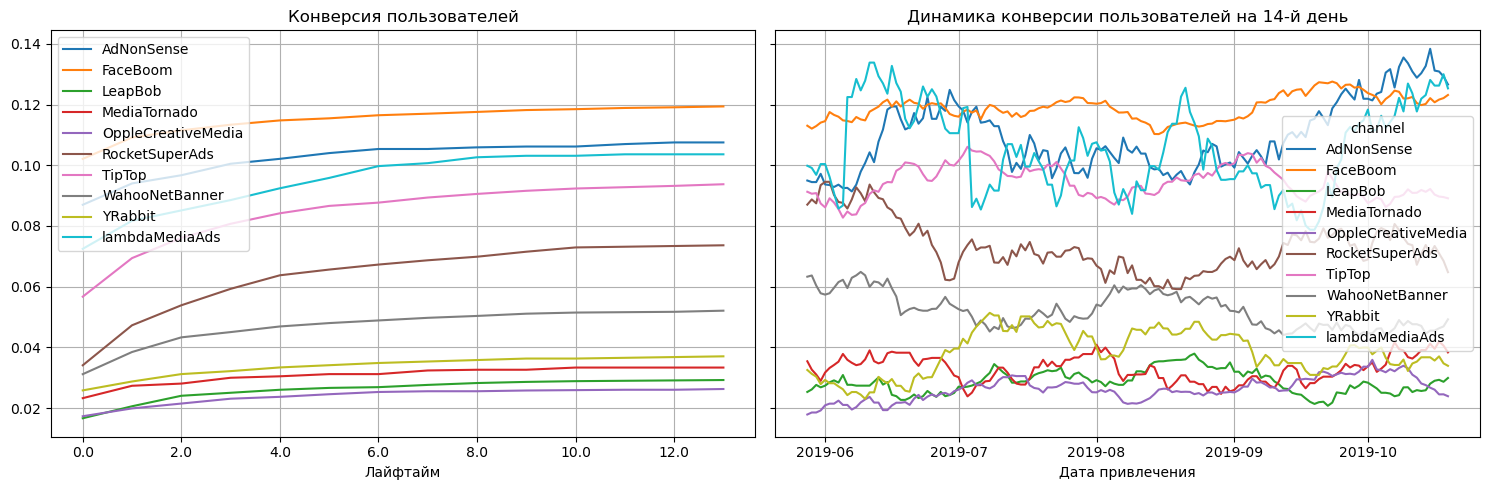

In [66]:
dimensions = ['channel']
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles_without_organic, orders, observation_date, horizon_days, dimensions=dimensions)

plot_conversion(conversion_grouped, conversion_history, horizon_days, window=28)

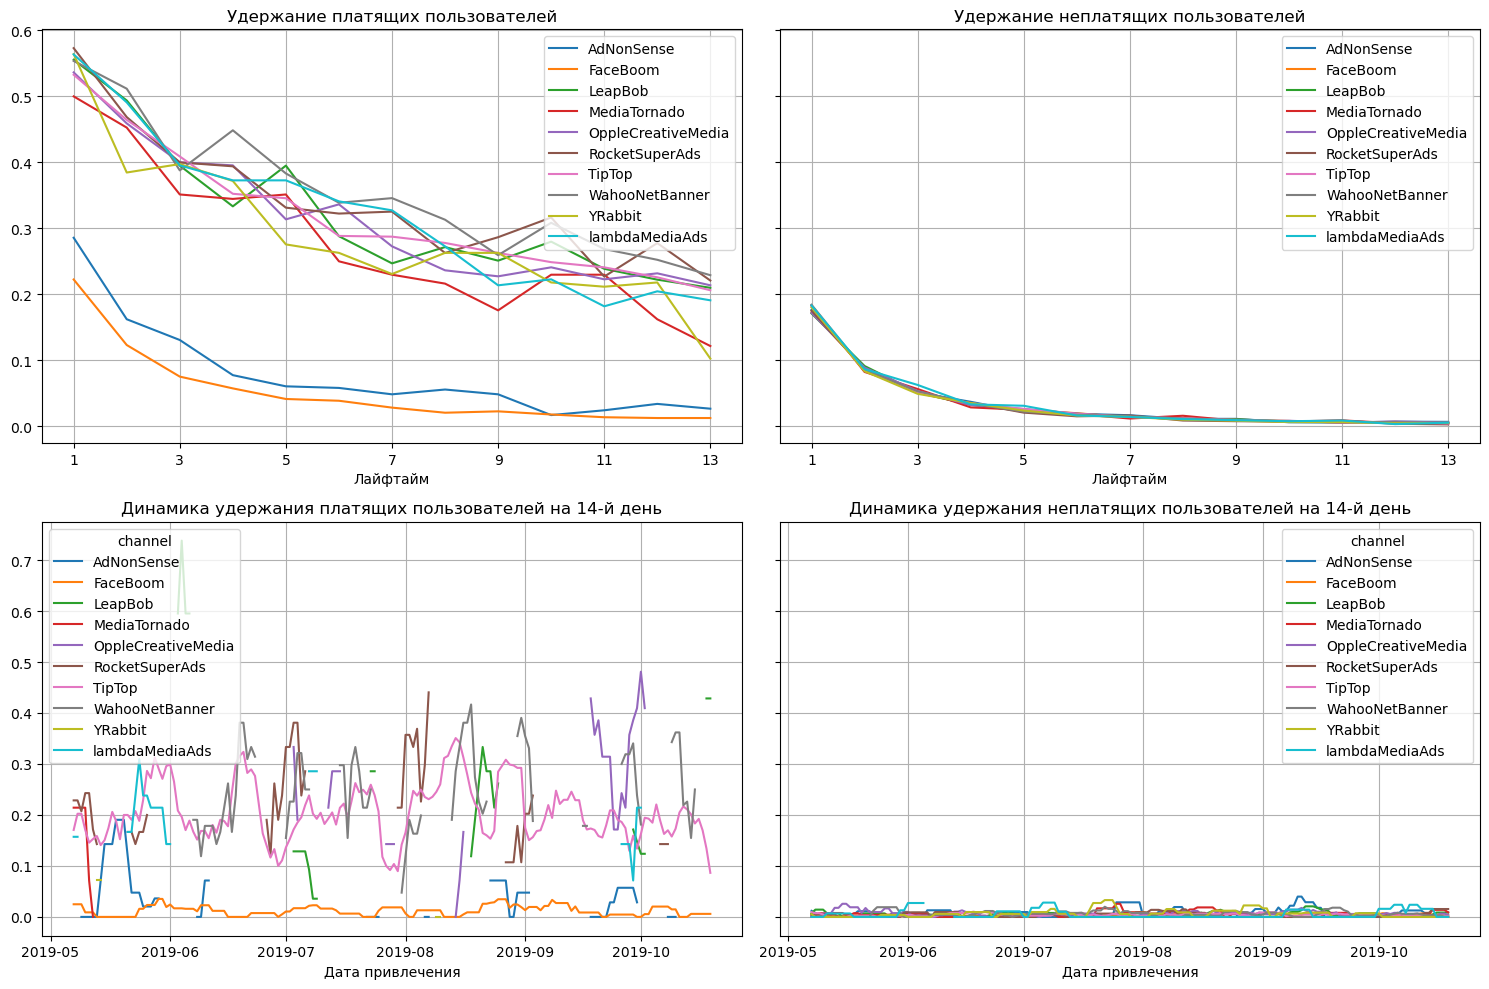

In [67]:
dimensions = ['channel']
retention_raw, retention_grouped, retention_history = get_retention(
    profiles_without_organic, visits, observation_date, horizon_days, dimensions=dimensions)

plot_retention(retention_grouped, retention_history, horizon_days) 

Самую высокую конверсию демонстрирует канал FaceBoom, однако процент удержания платящих пользователей практически стремится к нулю. Также очень низким удержанием характеризуется канал AdNonSense.<br>
Процент удержания для остальных каналов различается незначительно. Но при более высокой конверсии более прибыльным становится канал lambdaMediaAds.

### Вывод. <br>
**Самым невыгодным для компании регионом является США с их устройствами iPhone и Mac. Несмотря на самое большое количество платящих пользователей, реклама здесь не окупается. <br>
Самым доходным среди устройств является ПК, хотя доля платящих пользователей для данного типа устройств самая низкая. <br>
Самыми невыгодными источниками привлечения пользователей являются TipTop, FaceBoom и AdNonSense, при условии что затраты на TipTop и FaceBoom составляют порядка 83% всего бюджета.**

## 6. Выводы и предложения.

**Целью данного исследования являлась оценка показателей эффективности приложения Procrastinate Pro+, поиск причин убыточности бизнеса и разработка предложений по улучшению ситуации в компании. <br>
В ходе исследования был проведён предварительный анализ данных, который показал достаточно высокое качество данных - отстутвие пропусков и дубликатов. <br>
Однако потребовалась незначительная предобраотка данных в части приведения названий столбцов к нужному виду и некоторых данных к нужному типу.<br>
В ходе исследовательского анализа данных были определены страна (США), устройства (iPhone и Mac) и каналы привлечения (FaceBoom, AdNonSense, lambdaMediaAds и TipTop) с наибольшими долями привлечения платящих пользователей. <br>
В рамках общей оценки маркетинговой деятельности компании было рассчитано распределение трат на рекламу по источникам. Стоимость каналов TipTop и FaceBoom составляет около 83% всего рекламного бюджета компании. <br>
Также были рассчитаны средние траты на привлечение одного пользователя по каналам. Канал TipTop имеет самый высокий показатель, в разы превышающий все остальные. <br>
Оценка окупаемости рекламы в целом показала проблемы в этой сфере. Компания терпит убытки. <br>
Анализ окупаемости по факторам показал проблемы для США, устройств iPhone и Mac. Хотя они имеют самые высокие показатели конверсии, показатели стоимости привлечения пользователей также самые высокие, а процент удержания - самый низкий. <br>
На ПК самый низкий показатель конверсии, однако самый высокий показатель удержания самый высокий показатель окупаемости при самой низкой стоимости привлечения пользователей. <br>
Самый высокий показатель конверсии среди каналов привлечения - у FaceBoom, однако у него же самый низкий процент удержания и один из самых высоких показателей стоимости привлечения пользователей. Он не окупается. <br>
Хорошие показатели конверсии и удержания у каналов TipTop, lambdaMediaAds и AdNonSense. Однако TipTop - самый дорогой для компании канал. Он также не окупается. Канал AdNonSense также не окупается, к тому же имеет один из самых низких показателей удержания пользователей.<br>
<br>
Сотрудникам рекламного отдела стоит обратить более пристальное внимание на пользователей ПК. У них очень хорошие показатели удержания, низкая стоимость привлечения пользователей и соответственно высокий показатель окупаемости. Стоит продумать, как повысить конверсию для данной группы. <br>
Кроме того, по всей видимости, стоит отказаться от таких каналов как TipTop, FaceBoom и AdNonSense. Они седают большую часть бюджета рекламной кампании, однако не окупаются. У FaceBoom и AdNonSense кроме того самый низкий показатель удержания. <br>
Среди используемых каналов наилучшими показателями обладают lambdaMediaAds. Стоит увеличивать долю привлечения пользователей через этот канал. <br>
В США живёт основная часть пользователей iPhone и Mac. Здесь реклама не окупается из-за самой высокой стоимости привлечения пользователей. Также здесь самый низкий показатель удержания пользователей. Хотя конверсия самая высокая. Необходимо разобраться, в чём причина низкого процента удержания (возможно это некорректная работа приложения на операционных системах Apple), и постараться исправить это. К тому же стоит рассмотреть возможность применения других каналов привлечения в этом регионе - с меньшей стоимостью. Нельзя потерять этот сегмент рынка, ведь количество платящих пользователей в этой стране практически в 10 раз превышает аналогичное количество в любом другом регионе. Доля платящих пользователей здесь также самая высокая.**